In [ ]:
####################################################
# Python Program                                   #
#                                                  #
# Name: Joseph Forde                               #
# Student ID Number: T00215428                     #
# Data Analytics                                   #
# Soc,Siem, IDS,IPS Dataset                        #
# https://github.com/forde1909/MTU                 #
# Data set:- data.csv                              #
# Data subset:- datanew.csv                        #
# Date 20-07-2025                                  #
####################################################

Python Version been used

In [ ]:
!python --version

Python 3.11.13


# Artifact 2   

# Soc, Siem, IDS, IPS Dataset

Notebook also available at: https://github.com/forde1909/MTU

Data set: data.csv

Data subset: datanew.csv



### A. Import Python Modules and Dataset

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn import set_config

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import pickle
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/MTU/datanew.csv')


# B. EDA - Exploratory Data Analysis

---



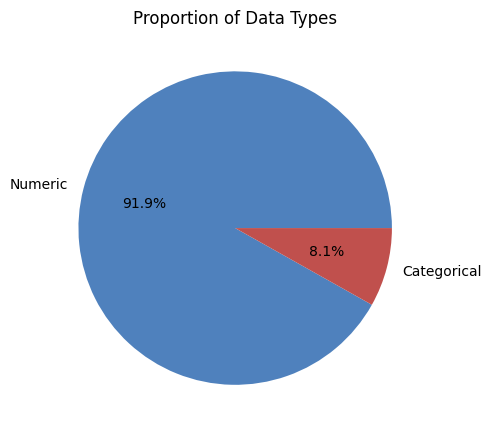

In [ ]:
import matplotlib.pyplot as plt

# Calculate number of columns by data type
type_counts = df.dtypes.replace({'float64': 'Numeric', 'int64': 'Numeric', 'object': 'Categorical'}).value_counts()


# Pie chart
plt.figure(figsize=(5, 5))
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#4F81BD', '#C0504D'])
plt.title('Proportion of Data Types')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.90-192.168.1.3-53930-64738-6,192.168.1.90,53930.0,192.168.1.3,64738,6.0,01/01/1970 07:41:46 AM,52601173.0,1701.0,1793.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Audio,Audio
1,192.168.1.70-192.168.1.3-55422-64738-6,192.168.1.70,55422.0,192.168.1.3,64738,6.0,01/01/1970 07:41:47 AM,118166562.0,3932.0,4196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Audio,Audio
2,192.168.1.90-192.168.1.3-58442-64738-6,192.168.1.90,58442.0,192.168.1.3,64738,6.0,01/01/1970 07:42:40 AM,117997246.0,4151.0,4451.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Audio,Audio
3,192.168.1.70-192.168.1.3-55422-64738-6,192.168.1.70,55422.0,192.168.1.3,64738,6.0,01/01/1970 07:43:47 AM,39624536.0,1319.0,1418.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Audio,Audio
4,192.168.1.70-192.168.1.3-40050-64738-6,192.168.1.70,40050.0,192.168.1.3,64738,6.0,01/01/1970 07:44:31 AM,119999242.0,3551.0,3829.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Audio,Audio


In [ ]:
df.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
814,192.168.1.70-192.168.1.90-52138-1234-17,192.168.1.70,52138.0,192.168.1.90,1234,17.0,02/01/1970 04:42:37 AM,16130304.0,1181.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Video,Video UDP
815,192.168.1.70-192.168.1.90-58078-1234-17,192.168.1.70,58078.0,192.168.1.90,1234,17.0,02/01/1970 04:42:54 AM,53502083.0,5561.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Video,Video UDP
816,192.168.1.70-192.168.1.90-49589-1234-17,192.168.1.70,49589.0,192.168.1.90,1234,17.0,02/01/1970 04:43:50 AM,19228470.0,1120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Video,Video UDP
817,192.168.1.70-192.168.1.90-37479-1234-17,192.168.1.70,37479.0,192.168.1.90,1234,17.0,02/01/1970 04:44:54 AM,22485411.0,2307.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Video,Video UDP
818,192.168.1.70-192.168.1.90-57042-1234-17,192.168.1.70,57042.0,192.168.1.90,1234,17.0,02/01/1970 04:45:18 AM,49795393.0,5256.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Video,Video UDP


In [ ]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,819.000000,819.000000,819.000000,8.190000e+02,819.000000,819.000000,8.190000e+02,8.190000e+02,819.000000,819.000000,...,819.000000,819.000000,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02
mean,38782.009768,8526.796093,7.492063,3.464105e+07,19702.620269,2111.318681,1.830502e+06,1.375858e+06,490.638584,310.041514,...,1652.720391,20.376068,2.570951e+06,5.173187e+05,3.144770e+06,2.237956e+06,1.843851e+06,3.145802e+05,2.076213e+06,1.619049e+06
std,20001.563769,19468.958329,5.758240,3.091700e+07,51654.764322,10119.290681,4.078500e+06,2.525898e+06,538.206951,560.344221,...,3085.189418,13.842114,9.660981e+06,3.041114e+06,1.083761e+07,9.219250e+06,6.154939e+06,3.386405e+06,8.023596e+06,4.799503e+06
min,0.000000,0.000000,0.000000,4.525326e+06,1005.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34569.000000,80.000000,6.000000,8.974588e+06,1373.500000,0.000000,1.370000e+02,0.000000e+00,131.000000,0.000000,...,1.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,45161.000000,80.000000,6.000000,2.777292e+07,2336.000000,1319.000000,2.248800e+04,3.055710e+05,228.000000,0.000000,...,101.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52523.000000,5004.000000,6.000000,5.512986e+07,6440.000000,1347.000000,4.200525e+05,1.661803e+06,1316.000000,0.000000,...,2217.500000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,64738.000000,64738.000000,17.000000,1.199994e+08,363356.000000,216394.000000,2.787946e+07,2.350732e+07,1348.000000,1328.000000,...,21184.000000,32.000000,9.988900e+07,4.609040e+07,9.988900e+07,9.988900e+07,5.294592e+07,4.430429e+07,8.265650e+07,2.691350e+07


In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (819, 86)


In [ ]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
           Src Port      Dst Port    Protocol  Flow Duration  \
count    819.000000    819.000000  819.000000   8.190000e+02   
mean   38782.009768   8526.796093    7.492063   3.464105e+07   
std    20001.563769  19468.958329    5.758240   3.091700e+07   
min        0.000000      0.000000    0.000000   4.525326e+06   
25%    34569.000000     80.000000    6.000000   8.974588e+06   
50%    45161.000000     80.000000    6.000000   2.777292e+07   
75%    52523.000000   5004.000000    6.000000   5.512986e+07   
max    64738.000000  64738.000000   17.000000   1.199994e+08   

       Total Fwd Packet  Total Bwd packets  Total Length of Fwd Packet  \
count        819.000000         819.000000                8.190000e+02   
mean       19702.620269        2111.318681                1.830502e+06   
std        51654.764322       10119.290681                4.078500e+06   
min         1005.000000           0.000000                0.000000e+00   
25%         1373.500000         

Check for missing values and outliers.

In [ ]:
df.isna().sum()

,0
Flow ID,0
Src IP,0
Src Port,0
Dst IP,0
Dst Port,0
...,...
Idle Max,0
Idle Min,0
Label,0
Traffic Type,0


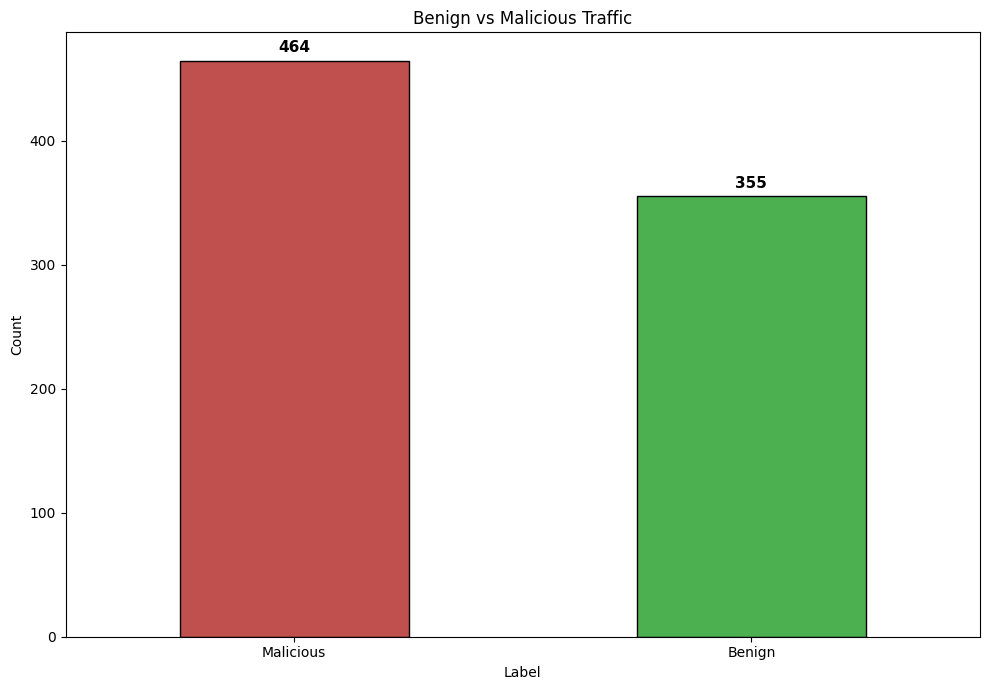

In [ ]:
# Treat "Benign" as benign, all other labels as "Malicious"
benign_mask = df['Label'].str.lower() == 'benign'
labels_simplified = df['Label'].where(benign_mask, 'Malicious')
benign_vs_malicious_counts = labels_simplified.value_counts()

# Bar chart with color and value labels
plt.figure(figsize=(10, 7))
ax = benign_vs_malicious_counts.plot(
    kind='bar',
    color=['#C0504D', '#4CAF50'],  # Red for Malicious, Green for Benign
    edgecolor='black'
)
plt.title('Benign vs Malicious Traffic')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add value labels on bars
for i, val in enumerate(benign_vs_malicious_counts):
    plt.text(i, val + max(benign_vs_malicious_counts)*0.01, str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



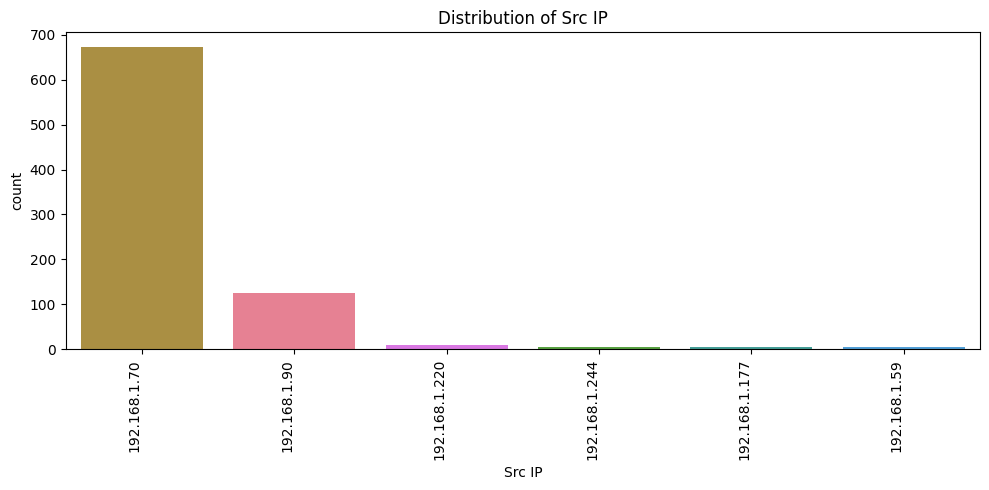

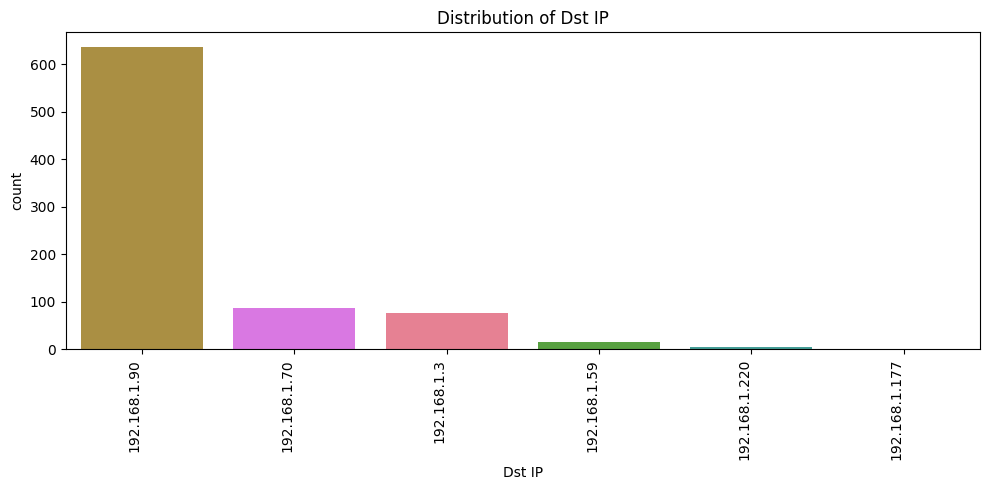

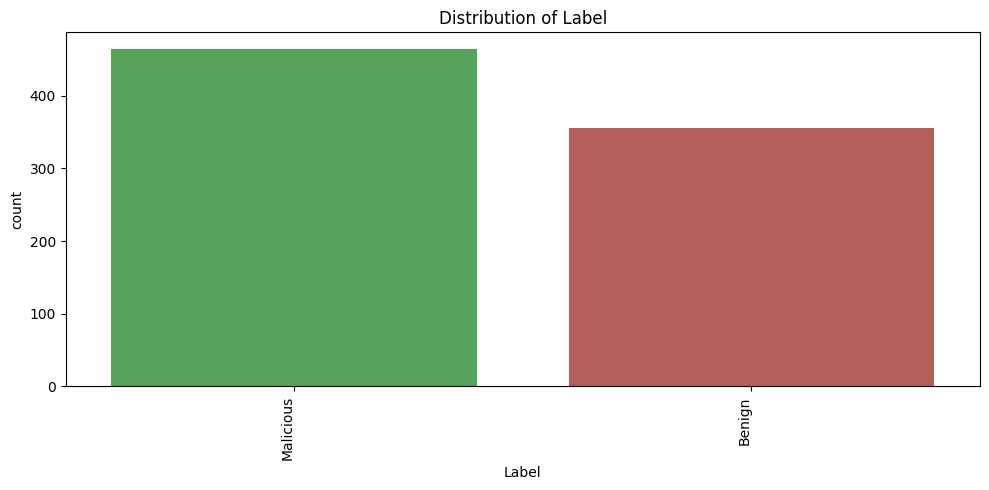

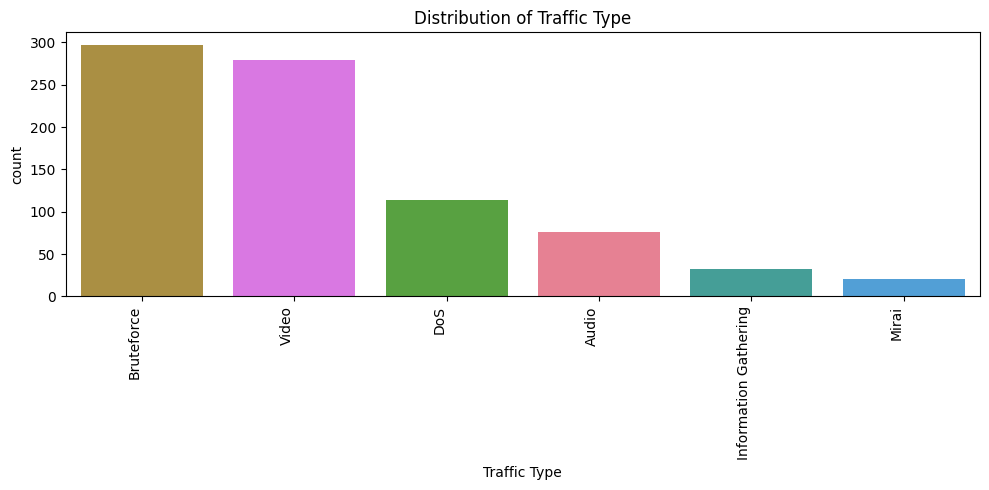

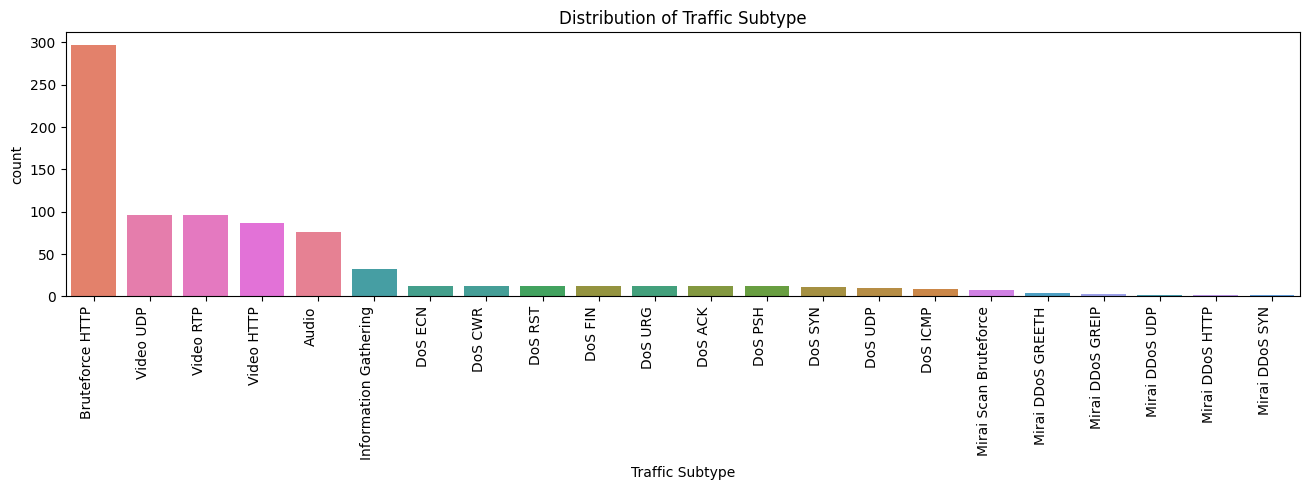

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df.select_dtypes(include='object').columns

if len(cat_cols) == 0:
    print("No categorical columns found in this dataset.")
else:
    for col in cat_cols:
        n_unique = df[col].nunique()
        if n_unique < 50:  # Beyond 50, colors get hard to tell apart
            plt.figure(figsize=(max(10, n_unique * 0.6), 5))
            categories = list(df[col].value_counts().index)
            # For high-cardinality columns (e.g. IP/type/subtype), use a non-repeating, distinct palette
            if any(x in col.lower() for x in ['ip', 'type', 'subtype']):
                palette = sns.color_palette("husl", n_unique)
            else:
                custom_palette = {
                    'Benign':     '#4CAF50',
                    'Malicious':  '#C0504D',
                    'DoS':        '#F79646',
                    'Bruteforce': '#8064A2',
                    'Mirai':      '#009E73',
                    'Video':      '#FFC20A',
                    'Audio':      '#17BECF',
                    'Information Gathering': '#FFD700',
                    'Web':        '#1F77B4',
                    'Other':      '#7F7F7F',
                }
                palette = [custom_palette.get(val, '#888888') for val in categories]

            sns.countplot(
                data=df, x=col, hue=col,
                order=categories,
                palette=palette,
                legend=False
            )
            plt.xticks(rotation=90, ha='right', fontsize=10)
            plt.title(f'Distribution of {col}')
            plt.tight_layout()
            plt.show()


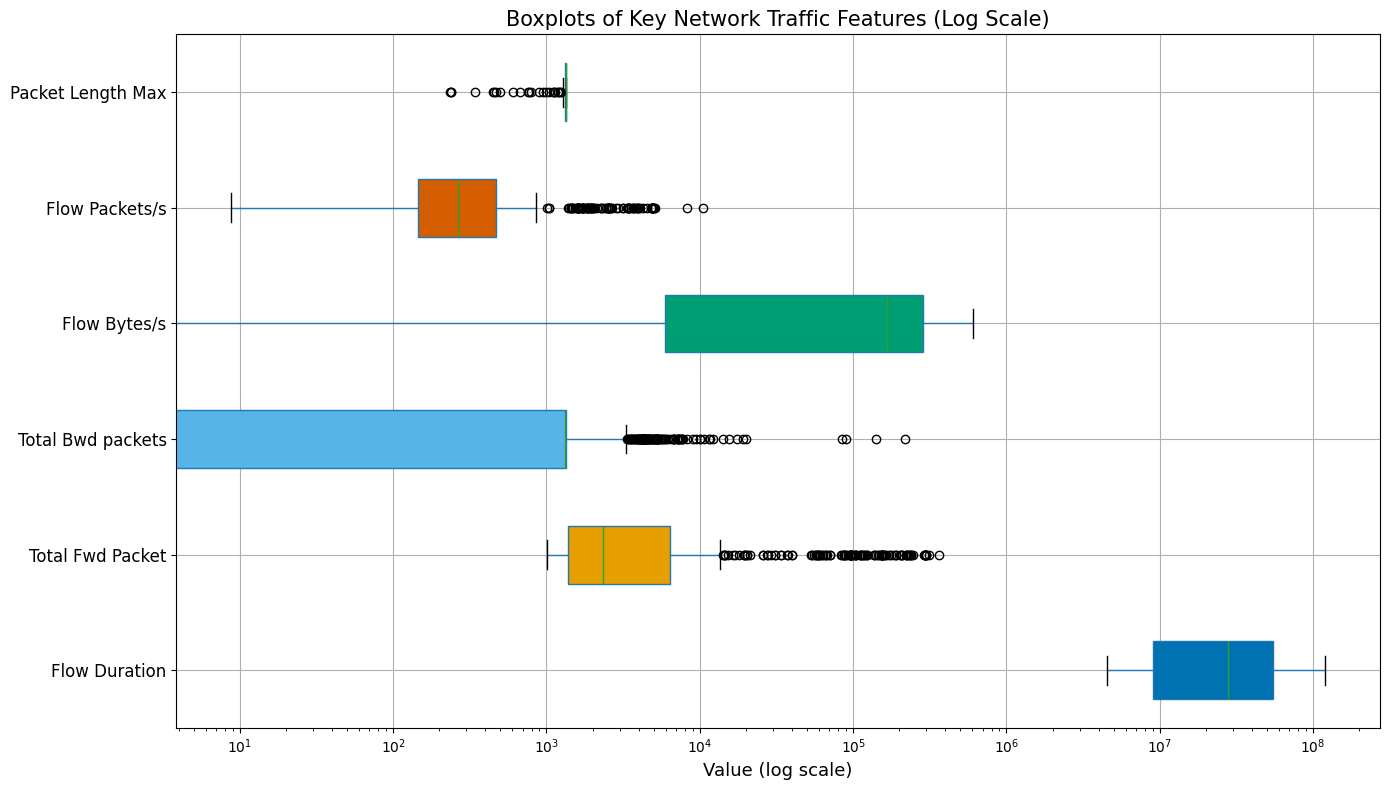

In [ ]:
import matplotlib.pyplot as plt

sample_features = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Flow Bytes/s', 'Flow Packets/s', 'Packet Length Max'
]

fig, ax = plt.subplots(figsize=(14, 8))

# The boxplot method returns a dict with keys like 'boxes', but let's use ax.patches for coloring
df[sample_features].boxplot(
    vert=False,
    patch_artist=True,
    ax=ax
)

# Assign unique colors
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#D55E00', '#CC79A7']
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

plt.xscale('log')
plt.xlabel('Value (log scale)', fontsize=13)
plt.title('Boxplots of Key Network Traffic Features (Log Scale)', fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Log Scale in Network Traffic Analysis**                           
                                                                               This dataset contains network flow features such as Flow Duration, Packet Counts, Packet Lengths, and Bytes per Second. These features can have values that range from very small (e.g., a few bytes or milliseconds) to extremely large (e.g., millions of bytes or very long flows).

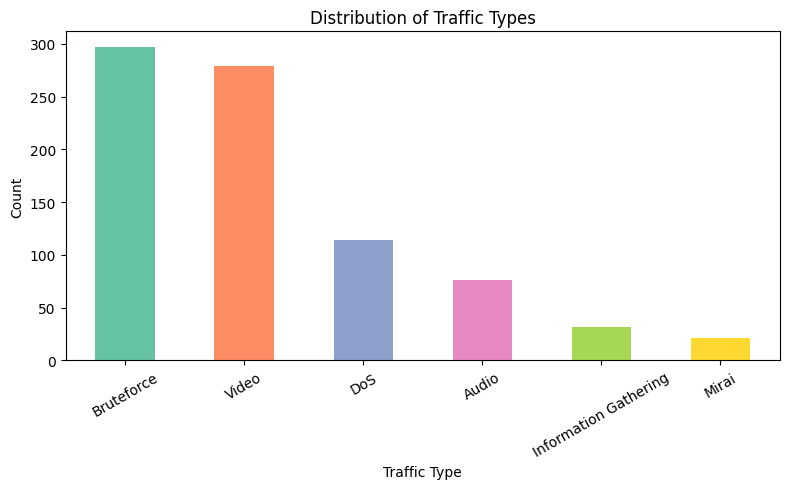

In [ ]:
import matplotlib.pyplot as plt

# Get value counts and their indexes for bar order
counts = df['Traffic Type'].value_counts()
traffic_types = counts.index

# Use a colormap for distinct colors
colors = plt.cm.Set2(range(len(traffic_types)))  # or try Set1, tab10, etc.

plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=colors)
plt.title('Distribution of Traffic Types')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



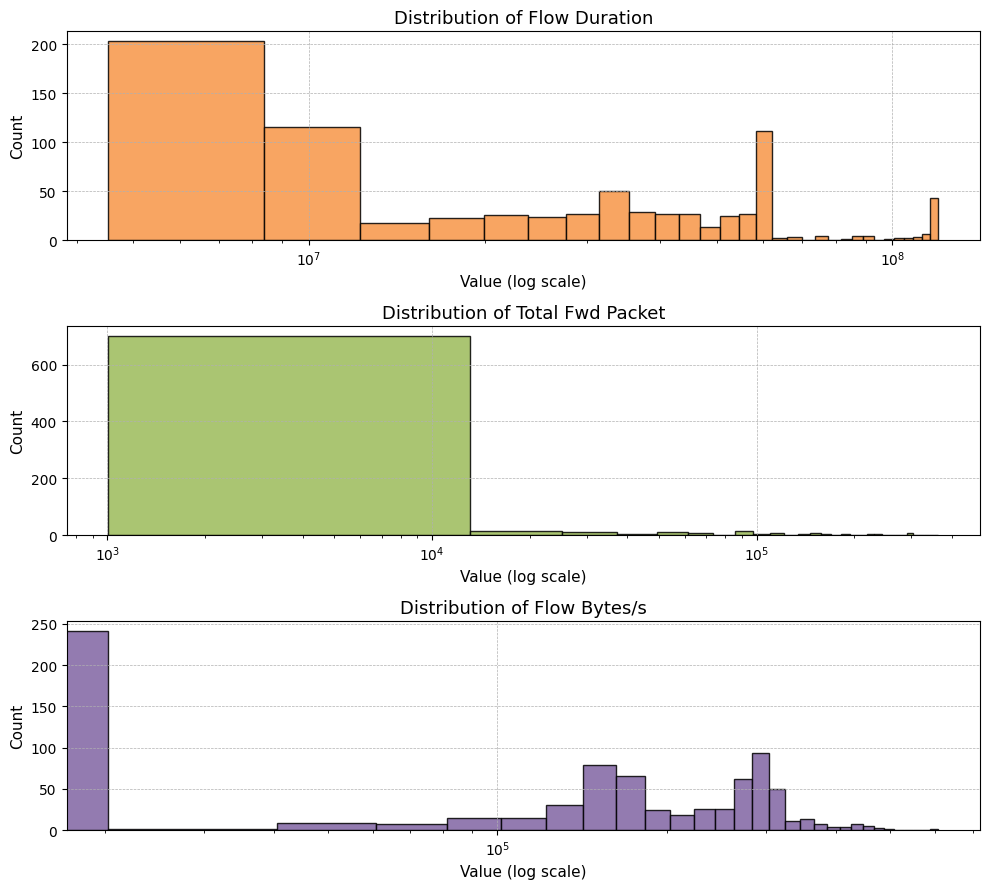

In [ ]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['Flow Duration', 'Total Fwd Packet', 'Flow Bytes/s']

# Use a non-blue color palette
colors = ['#F79646', '#9BBB59', '#8064A2']  # Orange, Green, Purple

n = len(features_to_plot)
fig, axes = plt.subplots(n, 1, figsize=(10, 3*n))

for i, col in enumerate(features_to_plot):
    ax = axes[i] if n > 1 else axes
    data = df[col].dropna()
    is_wide_range = data.max() > 1000
    ax.hist(data, bins=30, color=colors[i % len(colors)], edgecolor='black', alpha=0.85)
    ax.set_title(f'Distribution of {col}', fontsize=13)
    ax.set_xlabel('Value (log scale)' if is_wide_range else 'Value', fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    if is_wide_range:
        ax.set_xscale('log')
    ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


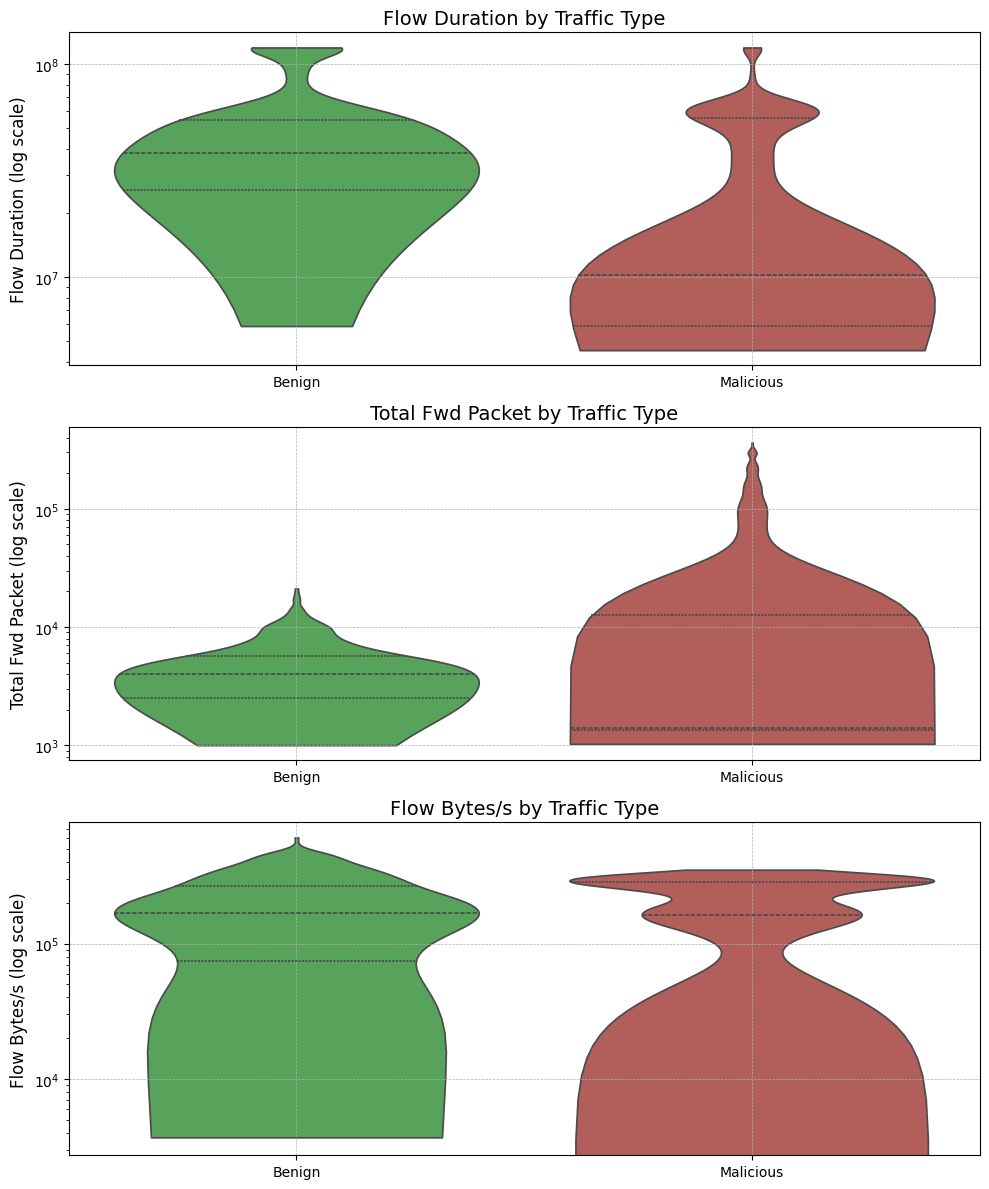

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Flow Duration', 'Total Fwd Packet', 'Flow Bytes/s']
labels_simplified = df['Label'].where(df['Label'].str.lower() == 'benign', 'Malicious')

# Prepare data in a "long" format for seaborn
df_viz = df[features_to_plot].copy()
df_viz['Traffic Type'] = labels_simplified

fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 4 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    ax = axes[i] if len(features_to_plot) > 1 else axes
    sns.violinplot(
        x='Traffic Type',
        y=feature,
        data=df_viz,
        hue='Traffic Type',  # Add this line
        legend=False,        # Prevent double legend
        palette={'Benign': '#4CAF50', 'Malicious': '#C0504D'},
        density_norm='width',  # Updated parameter for future seaborn
        inner='quartile',
        cut=0,
        ax=ax
    )
    ax.set_yscale('log' if df[feature].max() > 1000 else 'linear')
    ax.set_title(f'{feature} by Traffic Type', fontsize=14)
    ax.set_ylabel(f'{feature} (log scale)' if df[feature].max() > 1000 else feature, fontsize=12)
    ax.set_xlabel('')
    ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


**Violin Plots**

*   Wider sections: Indicate many data points at that value/range.
*   Narrow or tapered sections: Indicate rare or outlier values.

**Comparing Benign vs. Malicious:**


*   If one “violin” is generally higher/lower than the other, it means that feature can help separate the classes.
*   If “Malicious” has a much longer tail (especially on a log scale), attacks are more likely to produce extreme/abnormal values.

*little overlap and very different shapes, that feature is a good candidate for cyber threat detection.*






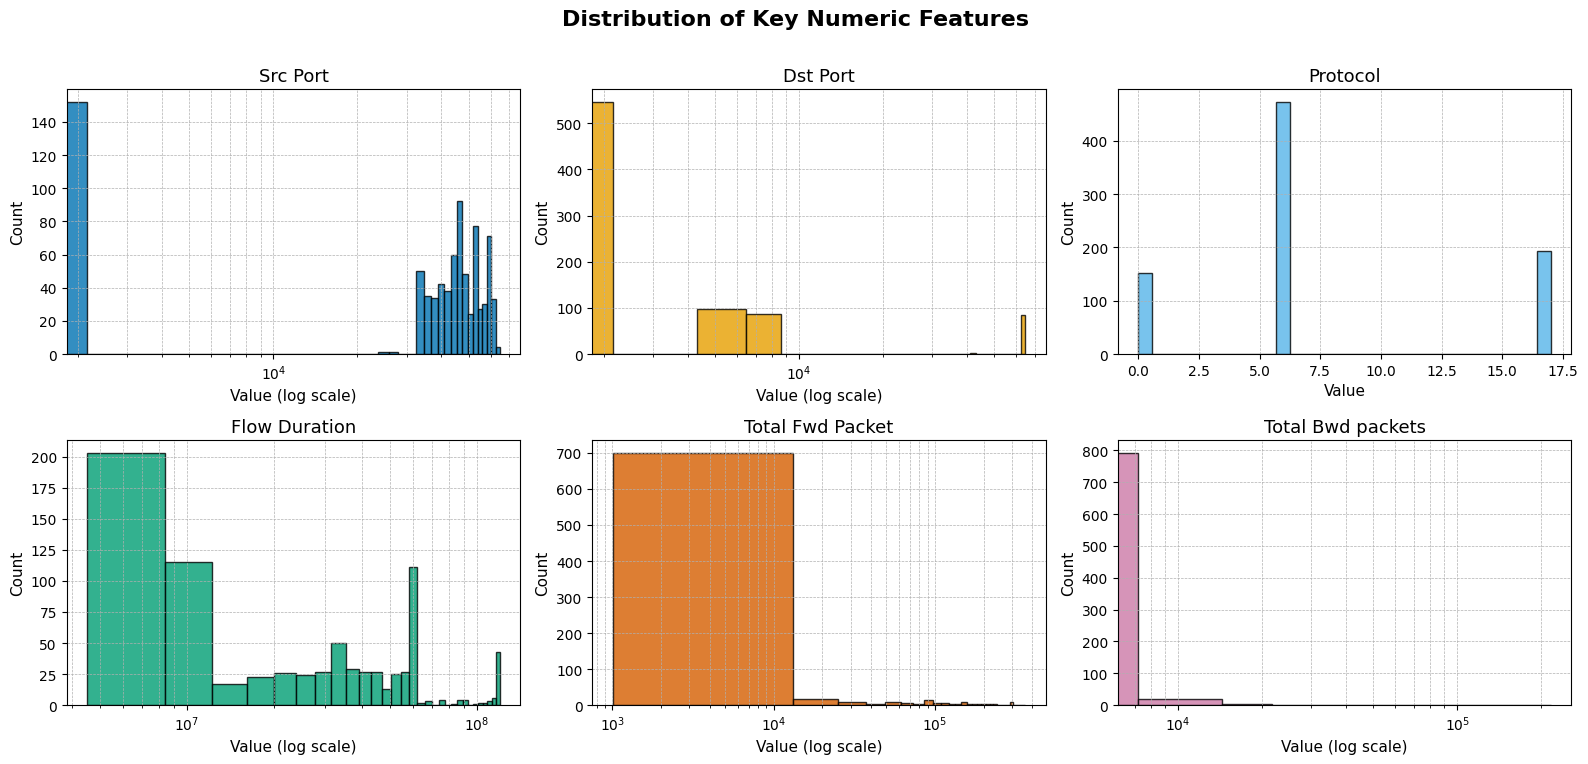

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose number of features per "page"
N = 6  # Change this to plot more/less features per batch
numeric_cols = df.select_dtypes(include=[np.number]).columns[:N]

# Setup grid for subplots
ncols = 3
nrows = int(np.ceil(N / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

# Use a visually distinct categorical color palette
color_palette = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#8B8B8B']

for i, col in enumerate(numeric_cols):
    # Use log scale if the feature has a wide value range
    data = df[col].dropna()
    is_wide_range = data.max() > 1000
    ax = axes[i]
    ax.hist(data, bins=30, color=color_palette[i % len(color_palette)], edgecolor='black', alpha=0.8)
    ax.set_title(col, fontsize=13)
    ax.set_xlabel('Value', fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    if is_wide_range:
        ax.set_xscale('log')
        ax.set_xlabel('Value (log scale)', fontsize=11)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribution of Key Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


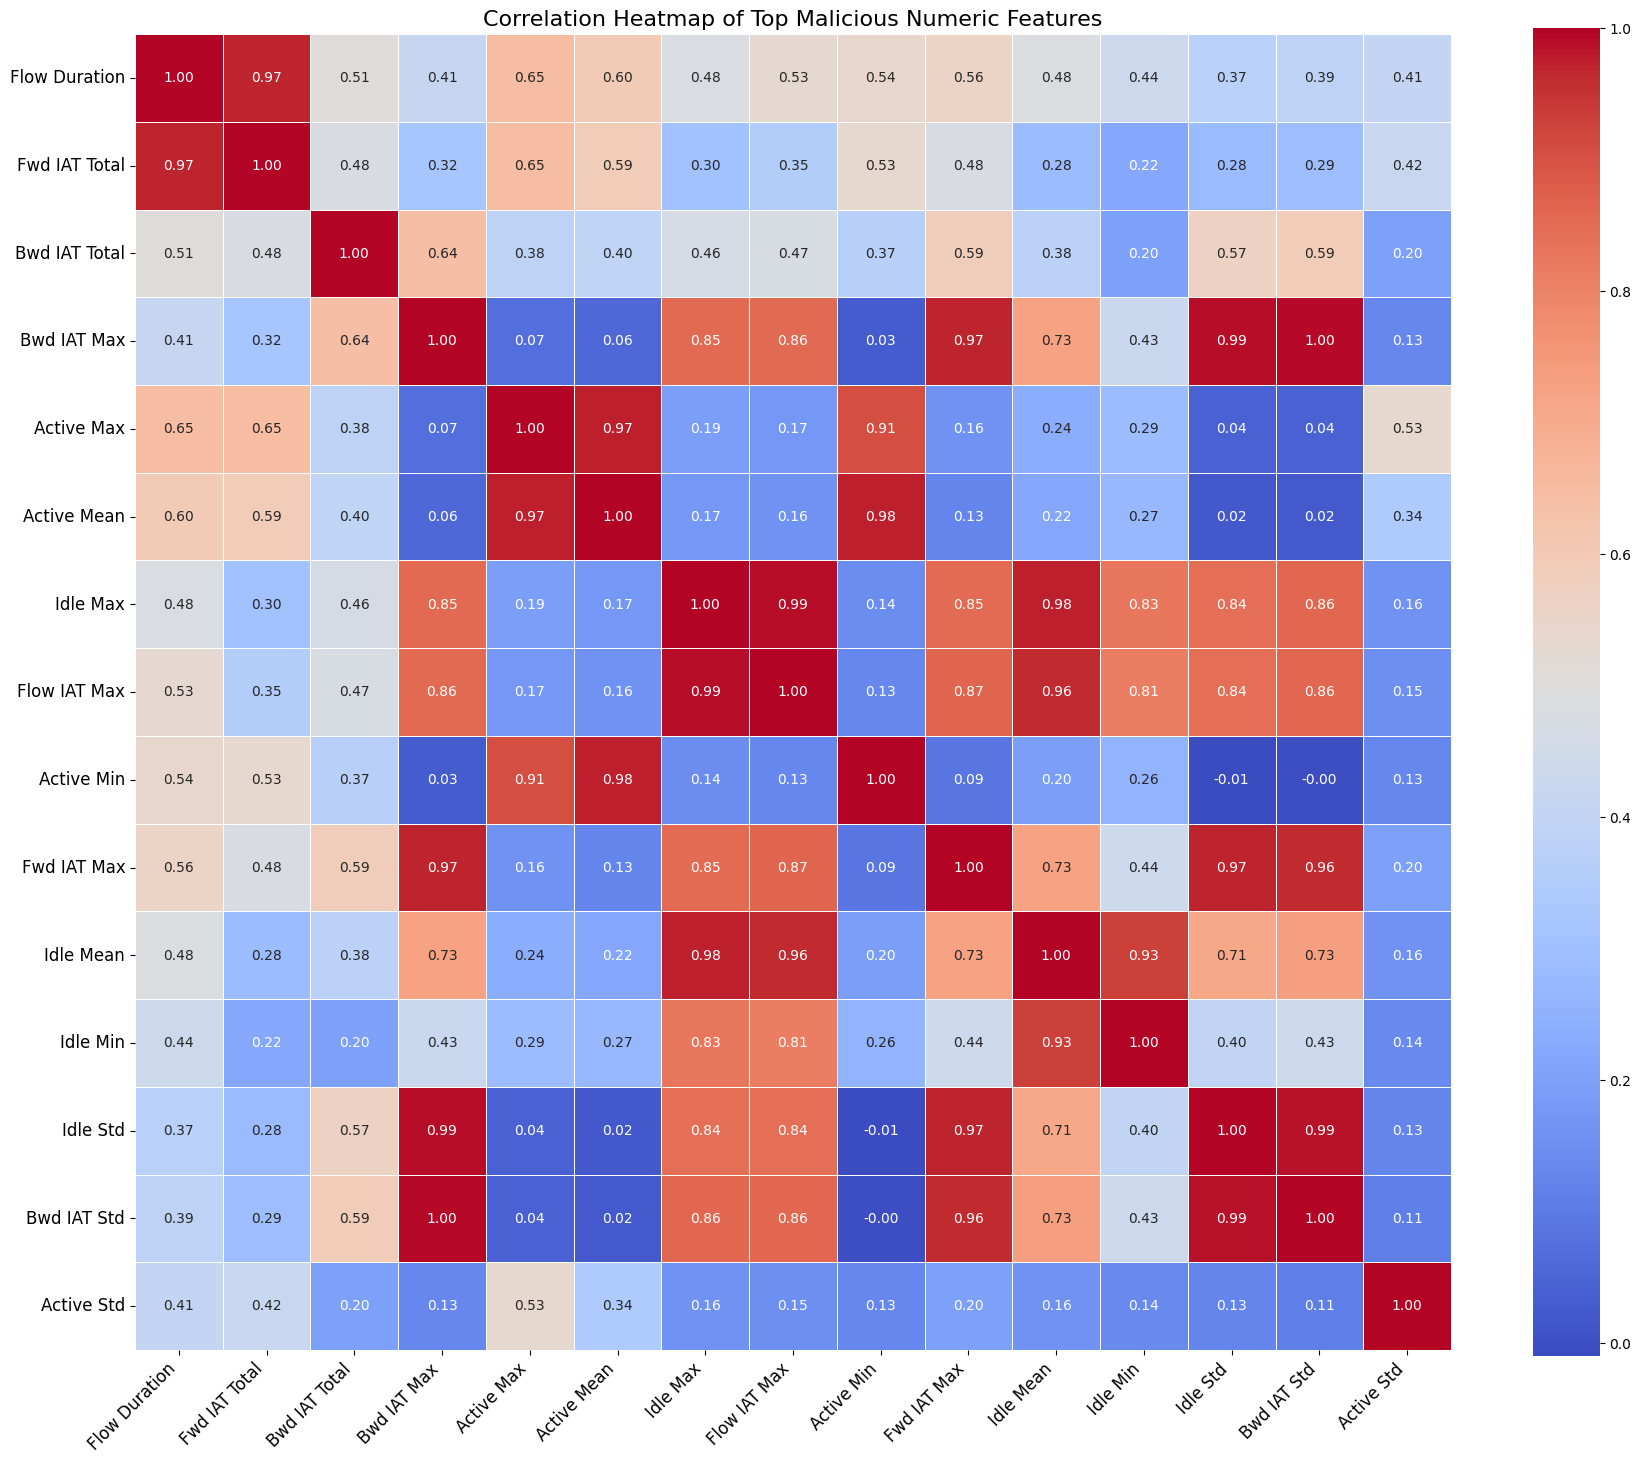

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a "Malicious" mask (assuming all non-'benign' are Malicious)
malicious_mask = df['Label'].str.lower() != 'benign'
df_malicious = df[malicious_mask]

# 2. Select numeric columns
num_cols = df_malicious.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Select top N by variance for best interpretability
N = 15  # Adjust as needed
top_cols = df_malicious[num_cols].var().sort_values(ascending=False).head(N).index.tolist()

# 4. Compute the correlation matrix for malicious features
corr_matrix = df_malicious[top_cols].corr()

# 5. Plot the heatmap
plt.figure(figsize=(1.2 * N, 1.2 * N))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap of Top Malicious Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Correlation Analysis**                                                                     

EDA is used to understand relationships among variables, eliminate redundancy, spot attack patterns, and build better, more reliable models

# C. Data Preparation

---




*   Check for missing values
*   Check for duplicate rows
*   Examine categorical variables
*   Unique values in categorical columns


In [ ]:


# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Examine categorical variables
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Unique values in categorical columns
unique_values = {col: df[col].nunique() for col in categorical_columns}

{
    "Missing Values": missing_values,
    "Duplicate Rows": duplicate_count,
    "Categorical Columns": categorical_columns,
    "Unique Values in Categorical Columns": unique_values
}




{'Missing Values': Series([], dtype: int64),
 'Duplicate Rows': np.int64(0),
 'Categorical Columns': ['Flow ID',
  'Src IP',
  'Dst IP',
  'Timestamp',
  'Label',
  'Traffic Type',
  'Traffic Subtype'],
 'Unique Values in Categorical Columns': {'Flow ID': 640,
  'Src IP': 6,
  'Dst IP': 6,
  'Timestamp': 589,
  'Label': 2,
  'Traffic Type': 6,
  'Traffic Subtype': 22}}

Encoding categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_columns_to_encode = ['Label', 'Traffic Type', 'Traffic Subtype']

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoder for future inverse_transform if needed

# Display encoded columns
df_encoded[categorical_columns_to_encode].head()


,Label,Traffic Type,Traffic Subtype
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


Feature Selection and Scaling

In [ ]:

# Drop non-numeric and identifier columns that are not useful for modelling
columns_to_drop = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']
df_model = df_encoded.drop(columns=columns_to_drop)

# Separate features and target
X = df_model.drop(columns=['Label'])
y = df_model['Label']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled data
X_scaled_df.head()


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Traffic Type,Traffic Subtype
0,0.757803,2.888986,-0.259276,0.581269,-0.348712,-0.031476,-0.412307,-0.489350,1.538195,-0.553644,...,-0.26628,-0.170212,-0.290349,-0.242896,-0.299756,-0.092952,-0.258922,-0.337543,-1.347071,-1.026434
1,0.832443,2.888986,-0.259276,2.703256,-0.305495,0.206137,-0.350006,-0.425606,1.593969,-0.553644,...,-0.26628,-0.170212,-0.290349,-0.242896,-0.299756,-0.092952,-0.258922,-0.337543,-1.347071,-1.026434
2,0.983523,2.888986,-0.259276,2.697776,-0.301252,0.231351,-0.372436,-0.391482,1.593969,-0.553644,...,-0.26628,-0.170212,-0.290349,-0.242896,-0.299756,-0.092952,-0.258922,-0.337543,-1.347071,-1.026434
3,0.832443,2.888986,-0.259276,0.161288,-0.356111,-0.068556,-0.423525,-0.499448,1.593969,-0.553644,...,-0.26628,-0.170212,-0.290349,-0.242896,-0.299756,-0.092952,-0.258922,-0.337543,-1.347071,-1.026434
4,0.063433,2.888986,-0.259276,2.762569,-0.312875,0.169847,-0.369658,-0.433926,1.593969,-0.553644,...,-0.26628,-0.170212,-0.290349,-0.242896,-0.299756,-0.092952,-0.258922,-0.337543,-1.347071,-1.026434


Correlation Heatmap

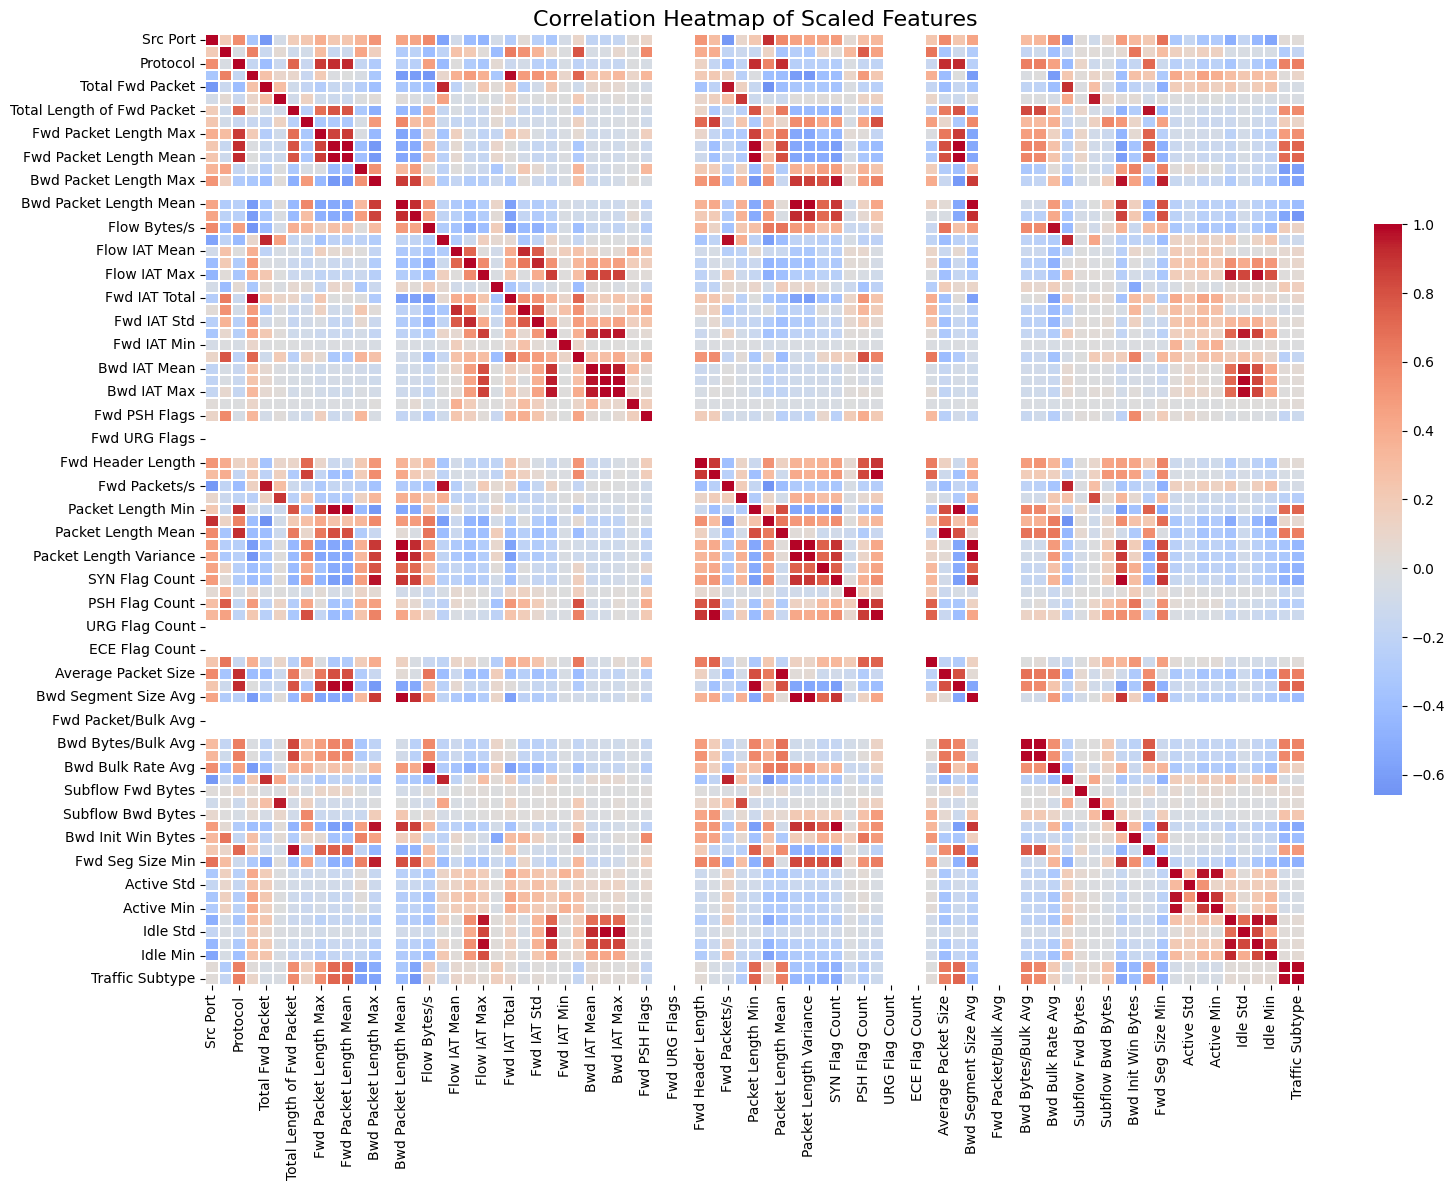

In [ ]:
# Compute the correlation matrix
correlation_matrix = X_scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=0.1, cbar_kws={"shrink": 0.6})
plt.title("Correlation Heatmap of Scaled Features", fontsize=16)
plt.tight_layout()
plt.show()



* Warm colours (red/orange) indicate strong positive correlations features that tend to increase together.
* Cool colours (Shades of blue) indicate negative or weak correlations  features that move inversely or have little association.


Visualise the top correlated feature pairs

Identified and removed the highly correlated features (correlation > 0.98).

In [ ]:
import numpy as np

# Compute correlation matrix of the scaled features
corr_matrix = X_scaled_df.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation greater than 0.98
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.98)]

# Drop these features
X_reduced = X_scaled_df.drop(columns=to_drop)

# Display results
print("Features to drop (highly correlated):")
print(to_drop)
print(f"\nOriginal feature count: {X_scaled_df.shape[1]}")
print(f"Reduced feature count: {X_reduced.shape[1]}")


Features to drop (highly correlated):
['Fwd Packet Length Mean', 'Fwd IAT Total', 'Bwd IAT Max', 'Packet Length Min', 'Packet Length Std', 'Packet Length Variance', 'ACK Flag Count', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Bwd Packet/Bulk Avg', 'FWD Init Win Bytes', 'Idle Std', 'Idle Max', 'Traffic Subtype']

Original feature count: 81
Reduced feature count: 66


The dataset has been reduced from 86 to 66 features, dropping the following columns:

In [ ]:

# Prepare lists
dropped = to_drop
remaining = list(X_reduced.columns)

# Display dropped features
print(f"Dropped Features ({len(dropped)}):")
for feature in dropped:
    print(f" - {feature}")

print(f"\nRemaining Features ({len(remaining)}):")
for feature in remaining:
    print(f" - {feature}")


Dropped Features (15):
 - Fwd Packet Length Mean
 - Fwd IAT Total
 - Bwd IAT Max
 - Packet Length Min
 - Packet Length Std
 - Packet Length Variance
 - ACK Flag Count
 - Average Packet Size
 - Fwd Segment Size Avg
 - Bwd Segment Size Avg
 - Bwd Packet/Bulk Avg
 - FWD Init Win Bytes
 - Idle Std
 - Idle Max
 - Traffic Subtype

Remaining Features (66):
 - Src Port
 - Dst Port
 - Protocol
 - Flow Duration
 - Total Fwd Packet
 - Total Bwd packets
 - Total Length of Fwd Packet
 - Total Length of Bwd Packet
 - Fwd Packet Length Max
 - Fwd Packet Length Min
 - Fwd Packet Length Std
 - Bwd Packet Length Max
 - Bwd Packet Length Min
 - Bwd Packet Length Mean
 - Bwd Packet Length Std
 - Flow Bytes/s
 - Flow Packets/s
 - Flow IAT Mean
 - Flow IAT Std
 - Flow IAT Max
 - Flow IAT Min
 - Fwd IAT Mean
 - Fwd IAT Std
 - Fwd IAT Max
 - Fwd IAT Min
 - Bwd IAT Total
 - Bwd IAT Mean
 - Bwd IAT Std
 - Bwd IAT Min
 - Fwd PSH Flags
 - Bwd PSH Flags
 - Fwd URG Flags
 - Bwd URG Flags
 - Fwd Header Length
 - Bwd


*   Dropped Features (15): These highly correlated features were removed to reduce redundancy.

*   Remaining Features (66): The full list of features retained for modelling after reduction.

# D. Define the Data Preparation Pipeline

---



In [ ]:

# 1. Drop non-predictive columns
drop_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']
df = df.drop(columns=drop_cols)
print(f"Shape after dropping ID columns: {df.shape}")

# 2. Encode categorical variables
categorical_cols = ['Label', 'Traffic Type', 'Traffic Subtype']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
print("Categorical encoding complete.")

# 3. Feature Scaling
feature_cols = df.columns.drop('Label')
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])
print("Feature scaling complete.")

# 4. Redundancy Reduction via Correlation Threshold
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.98)]
print(f"Features to drop (corr > 0.98): {to_drop}")

# Prepare final datasets
X_reduced = df.drop(columns=to_drop + ['Label'])
y = df['Label']
print(f"Final feature set shape: {X_reduced.shape}")
print(f"Target vector shape: {y.shape}")


Shape after dropping ID columns: (819, 82)
Categorical encoding complete.
Feature scaling complete.
Features to drop (corr > 0.98): ['Fwd Packet Length Mean', 'Fwd IAT Total', 'Bwd IAT Max', 'Packet Length Min', 'Packet Length Std', 'Packet Length Variance', 'ACK Flag Count', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Bwd Packet/Bulk Avg', 'FWD Init Win Bytes', 'Idle Std', 'Idle Max', 'Traffic Subtype']
Final feature set shape: (819, 66)
Target vector shape: (819,)


Apply PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Re-run PCA on the reduced feature set (X_reduced should already be in scope)
pca = PCA()
pca.fit(X_reduced)

# Prepare DataFrame of explained variance
var_df = pd.DataFrame({
    "Principal Component": range(1, len(pca.explained_variance_ratio_) + 1),
    "Explained Variance Ratio": pca.explained_variance_ratio_,
    "Cumulative Explained Variance": pca.explained_variance_ratio_.cumsum()
})

# Display the top 10 components
print(var_df.head(10).to_string(index=False))


 Principal Component  Explained Variance Ratio  Cumulative Explained Variance
                   1                  0.213540                       0.213540
                   2                  0.173725                       0.387265
                   3                  0.125939                       0.513204
                   4                  0.076698                       0.589902
                   5                  0.070019                       0.659921
                   6                  0.049836                       0.709757
                   7                  0.041946                       0.751703
                   8                  0.038912                       0.790615
                   9                  0.022147                       0.812763
                  10                  0.019840                       0.832603


PCA explained variance for the top 10 components

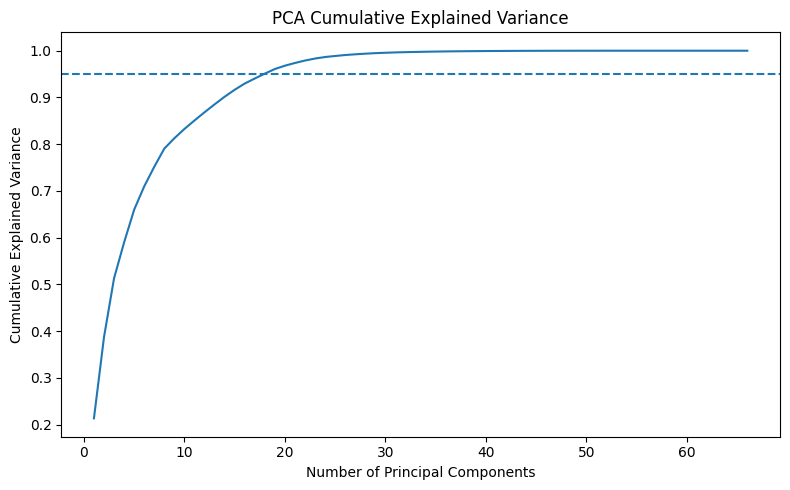

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to the reduced feature set
pca = PCA()
pca.fit(X_reduced)

# Calculate cumulative explained variance
cum_explained = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_explained) + 1), cum_explained)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.axhline(y=0.95, linestyle='--')
plt.tight_layout()
plt.show()


PCA cumulative graph, showing how the first 20–25 components capture over 95% of the variance (dashed line).

Split the data into training and testing sets

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd

# Re-apply PCA to ensure X_pca_df is defined in this scope
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_reduced)  # X_reduced from previous steps
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes and a preview of data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}\n")

print("Preview of X_train:")
print(X_train.head())


X_train shape: (655, 18)
X_test shape:  (164, 18)
y_train shape: (655,)
y_test shape:  (164,)

Preview of X_train:
          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
116  3.144788 -1.081899 -1.565374  0.621649 -0.296908 -0.131579 -0.264910   
342  2.149713 -1.161100 -1.475132  0.917110 -1.062891 -0.237775 -0.006938   
127  2.776608 -0.766514 -1.961407  0.910461 -0.675967 -0.183342 -0.176305   
405 -5.982912 -1.861822  2.777335  2.186145 -2.745692  1.664783  5.598094   
2    1.019816 -5.517959  5.664983 -2.526869 -0.438823 -2.791097 -1.609180   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
116  0.623713  0.050645  0.157885  0.081987  0.163954  0.028190  0.052047   
342  0.310453 -0.011833 -0.018194 -0.080266 -0.181345 -0.065502 -0.017385   
127  0.835350  0.182577  0.119564  0.070634 -0.171075  0.251518  0.115640   
405 -1.840191 -0.484812  0.917506  0.180781 -2.099989  1.970007 -0.216492   
2    0.393444 -0.187382 -0.737460 -0.

## E. Models

---

SVM

Support Vector Machine (supervised machine learning algorithm)

(Good at solving binary classification problems)

 *Visualise the main pipeline*

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Define which columns are categorical vs numeric
categorical_features = ['Traffic Type', 'Traffic Subtype']
numeric_features = [col for col in df.columns if col not in categorical_features + ['Label', 'Flow ID', 'Src IP', 'Dst IP', 'Timestamp']]

# Create the preprocessing pipeline
preprocessor_pipeline = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(), categorical_features)
])

# Create the SVM pipeline with PCA for dimensionality reduction
svm_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor_pipeline),
    ('dimension_reduction', PCA(n_components=0.95, svd_solver='full')),
    ('classifier', SVC(kernel='rbf', random_state=42))
])



In [ ]:


# Create the SVM pipeline
svm_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor_pipeline),     # cleaner name
    ('dimension_reduction', 'passthrough'),        # fix typo and name
    ('classifier', svm.SVC(
        probability=True,
        random_state=42
    ))
])

# Display the pipeline diagram
set_config(display="diagram")

# Show the pipeline
svm_pipe


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Src Port', 'Dst Port',
                                                   'Protocol', 'Flow Duration',
                                                   'Total Fwd Packet',
                                                   'Total Bwd packets',
                                                   'Total Length of Fwd Packet',
                                                   'Total Length of Bwd Packet',
                                                   'Fwd Packet Length Max',
                                                   'Fwd Packet Length Min',
                                                   'Fwd Packet Length Mean',
                                                   'Fwd Packet Length Std',
                                                   'Bwd Packet Length Max',
                                                   'Bwd Packet Length Min',
                                                   'B...
                                                   'Bwd Packet Length Std',
                                                   'Flow Bytes/s',
                                                   'Flow Packets/s',
                                                   'Flow IAT Mean',
                                                   'Flow IAT Std',
                                                   'Flow IAT Max',
                                                   'Flow IAT Min',
                                                   'Fwd IAT Total',
                                                   'Fwd IAT Mean',
                                                   'Fwd IAT Std', 'Fwd IAT Max',
                                                   'Fwd IAT Min',
                                                   'Bwd IAT Total',
                                                   'Bwd IAT Mean',
                                                   'Bwd IAT Std', ...]),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Traffic Type',
                                                   'Traffic Subtype'])])),
                ('dimension_reduction', 'passthrough'),
                ('classifier', SVC(probability=True, random_state=42))])

Train the model by exploring various combinations of values of the parameters of the predictor, SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load and prepare raw data
df = pd.read_csv('/content/gdrive/MyDrive/MTU/datanew.csv')
X_raw = df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label'])
y = df['Label']

# 2. Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Define preprocessing and pipeline
categorical_features = ['Traffic Type', 'Traffic Subtype']
numeric_features = [c for c in X_raw.columns if c not in categorical_features]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(), categorical_features)
])

pipeline = Pipeline([
    ('preproc', preprocessor),
    ('pca', PCA(n_components=0.95, svd_solver='full')),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

# 4. Define parameter grid for SVM hyperparameters
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1]
}

# 5. Configure GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 6. Run grid search
grid.fit(X_train_raw, y_train)

# 7. Output best parameters and cross-validation score
print("Best Parameters:", grid.best_params_)
print(f"Best CV Accuracy: {grid.best_score_:.4f}")

# 8. Evaluate on test set
test_acc = grid.score(X_test_raw, y_test)
print(f"Test Set Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale'}
Best CV Accuracy: nan
Test Set Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'svm__C': 0.1, 'svm__gamma': 'scale'}
Test accuracy:   1.0
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        71
   Malicious       1.00      1.00      1.00        93

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



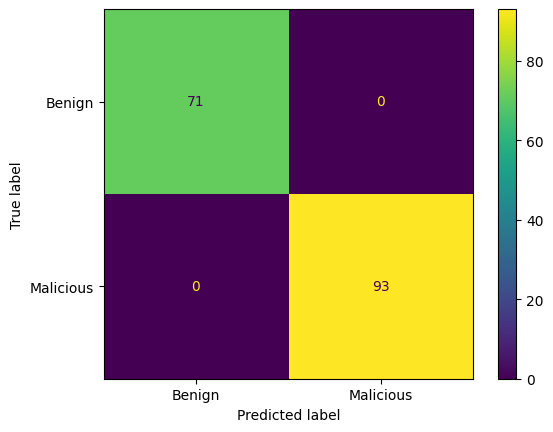

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# 1. Load the raw data


# 2. Define X_raw and y
X_raw = df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label'])
y      = df['Label']

# 3. Split into train/test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Identify numeric vs categorical
categorical_features = ['Traffic Type', 'Traffic Subtype']
numeric_features     = [c for c in X_raw.columns if c not in categorical_features]

# 5. Build preprocessing step
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),  numeric_features),
    ('cat', OrdinalEncoder(),   categorical_features)
])

# 6. Create the full pipeline
svm_pipe = Pipeline([
    ('preproc', preprocessor),
    ('pca',      PCA(n_components=0.95, svd_solver='full')),
    ('svm',      SVC(kernel='rbf', random_state=42))
])

# 7. (Optional) Hyperparameter tuning with GridSearchCV
param_grid = {
    'svm__C':     [0.1, 1, 10],
    'svm__gamma': ['scale', 0.01, 0.1, 1]
}

grid = GridSearchCV(
    svm_pipe,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 8. Fit the pipeline (or grid) on the RAW training data
grid.fit(X_train_raw, y_train)

# 9. Evaluate on the RAW test data
best_pipe = grid.best_estimator_
print("Best parameters:", grid.best_params_)
print("Test accuracy:  ", best_pipe.score(X_test_raw, y_test))

# 10. Confusion matrix & report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = best_pipe.predict(X_test_raw)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=best_pipe.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=best_pipe.classes_)
disp.plot(cmap='viridis')


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Re-define the SVM pipeline to only include the classifier
# since X_train and y_train are already preprocessed and reduced.
svm_pipe = Pipeline(steps=[
    ('classifier', SVC(
        probability=True,
        random_state=42
    ))
])


# Define the search space for Bayesian optimization
# Removed the preprocessing and dimension_reduction steps from the search space
param_space_svm = {
        'classifier__C': Real(1e-1, 1e3, prior='log-uniform'),
        'classifier__gamma': Real(1e-5, 1, prior='log-uniform'),
        'classifier__kernel': Categorical(['linear', 'rbf', 'poly'])
    }


# Set up Bayesian optimization with BayesSearchCV
bayes_opt_svm = BayesSearchCV(
    estimator=svm_pipe,                  # pipeline
    search_spaces=param_space_svm,
    n_iter=20,               # You can increase to 20-30 for better results
    cv=5,                       # 5-fold cross-validatio
    n_jobs=-1,                      # Use all CPU cores
    random_state=42,
    refit=True,
    verbose=2
)

# Fit the model
bayes_opt_svm.fit(X_train, y_train)

# Print best results
print(f"\n Best CV score: {bayes_opt_svm.best_score_:.4f}")
print(" Best Parameters Found:")
for param, val in bayes_opt_svm.best_params_.items():
    print(f"   {param}: {val}")

# Save the best model
bayes_SVM_best_model = bayes_opt_svm.best_estimator_
bayes_SVM_best_params = bayes_opt_svm.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Random Forest

Machine Learning Algorithm that combines multiple decision trees to make predictions

 *Visualise the main pipeline*

In [ ]:

# Create the Random Forest pipeline
random_forest_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor_pipeline),     # clearer name: 'preprocessing'
    ('dimension_reduction', 'passthrough'),        # clearer name: 'dimension_reduction'
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42
    ))
])

# Show the pipeline
random_forest_pipe


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Src Port', 'Dst Port',
                                                   'Protocol', 'Flow Duration',
                                                   'Total Fwd Packet',
                                                   'Total Bwd packets',
                                                   'Total Length of Fwd Packet',
                                                   'Total Length of Bwd Packet',
                                                   'Fwd Packet Length Max',
                                                   'Fwd Packet Length Min',
                                                   'Fwd Packet Length Mean',
                                                   'Fwd Packet Length Std',
                                                   'Bwd Packet Length Max',
                                                   'Bwd Packet Length Min',
                                                   'B...
                                                   'Bwd Packet Length Std',
                                                   'Flow Bytes/s',
                                                   'Flow Packets/s',
                                                   'Flow IAT Mean',
                                                   'Flow IAT Std',
                                                   'Flow IAT Max',
                                                   'Flow IAT Min',
                                                   'Fwd IAT Total',
                                                   'Fwd IAT Mean',
                                                   'Fwd IAT Std', 'Fwd IAT Max',
                                                   'Fwd IAT Min',
                                                   'Bwd IAT Total',
                                                   'Bwd IAT Mean',
                                                   'Bwd IAT Std', ...]),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Traffic Type',
                                                   'Traffic Subtype'])])),
                ('dimension_reduction', 'passthrough'),
                ('classifier', RandomForestClassifier(random_state=42))])

Train the model by exploring various combinations of values of the parameters of the predictor, Random Forest

In [ ]:
# Step 1: Inspect current X_train
print("Current X_train columns:\n", X_train.columns.tolist())

# Step 2: Rebuild numeric and categorical column lists
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 3: Rebuild the preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encode', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Step 4: Rebuild the full pipeline
pipeline = Pipeline([
    ('preproc', preprocessor),
    ('pca', PCA(n_components=0.95, svd_solver='full')),
    ('svm', SVC(probability=True, random_state=42))
])

# Step 5: Redefine the GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 0.01, 0.1],
    'svm__kernel': ['rbf']
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Step 6: Fit again with corrected setup
print("Fitting the corrected pipeline...")
grid.fit(X_train, y_train)


Current X_train columns:
 ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
Fitting the corrected pipeline...


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['PC1',
                                                                          'PC2',
                                                                          'PC3',
                                                                          'PC4',
                                                                          'PC5',
                                                                          'PC6',
                                                                          'PC7',
                                                                          'PC8',
                                                                          'PC9',
                                                                          'PC10',
                                                                          'PC11',
                                                                          'PC12',
                                                                          'PC13',
                                                                          'PC14',
                                                                          'PC15',
                                                                          'PC16',
                                                                          'PC17',
                                                                          'PC18']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('pca',
                                        PCA(n_components=0.95,
                                            svd_solver='full')),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 0.01, 0.1],
                         'svm__kernel': ['rbf']},
             scoring='accuracy')

Fitting the best pipeline...
 Pipeline training completed in 0.05 seconds.
Best Params:     {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best CV Score:   0.9786491279516288
Test Set Score:  0.9878048780487805


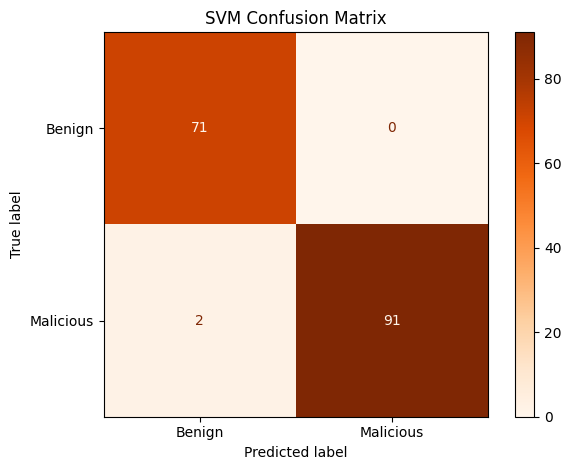

In [ ]:
import time
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the best pipeline from GridSearchCV
print("Fitting the best pipeline...")
start_time = time.time()

best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f" Pipeline training completed in {elapsed_time:.2f} seconds.")

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation
print("Best Params:    ", grid.best_params_)
print("Best CV Score:  ", grid.best_score_)
print("Test Set Score: ", grid.score(X_test, y_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Plot confusion matrix
disp.plot(cmap='Oranges')
plt.title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()


Logistic Regression

Is also a supervised machine learning algorithm widely used for binary classification tasks

 *Visualise the main pipeline*

In [ ]:
from sklearn.linear_model import LinearRegression
# Create the pipeline
linear_regression_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor_pipeline),     # preprocessing for scaling, encoding
    ('dimension_reduction', 'passthrough'),        # placeholder: can insert PCA or RFE
    ('regressor', LinearRegression())              # final regressor
])

# Enable beautiful diagram display
set_config(display='diagram')

# Display the pipeline
linear_regression_pipe


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Src Port', 'Dst Port',
                                                   'Protocol', 'Flow Duration',
                                                   'Total Fwd Packet',
                                                   'Total Bwd packets',
                                                   'Total Length of Fwd Packet',
                                                   'Total Length of Bwd Packet',
                                                   'Fwd Packet Length Max',
                                                   'Fwd Packet Length Min',
                                                   'Fwd Packet Length Mean',
                                                   'Fwd Packet Length Std',
                                                   'Bwd Packet Length Max',
                                                   'Bwd Packet Length Min',
                                                   'B...ean',
                                                   'Bwd Packet Length Std',
                                                   'Flow Bytes/s',
                                                   'Flow Packets/s',
                                                   'Flow IAT Mean',
                                                   'Flow IAT Std',
                                                   'Flow IAT Max',
                                                   'Flow IAT Min',
                                                   'Fwd IAT Total',
                                                   'Fwd IAT Mean',
                                                   'Fwd IAT Std', 'Fwd IAT Max',
                                                   'Fwd IAT Min',
                                                   'Bwd IAT Total',
                                                   'Bwd IAT Mean',
                                                   'Bwd IAT Std', ...]),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Traffic Type',
                                                   'Traffic Subtype'])])),
                ('dimension_reduction', 'passthrough'),
                ('regressor', LinearRegression())])

Train the model by exploring various combinations of values of the parameters of the predictor, Linear Regression

Hyperparameter Tuning:  20%|████████▏                                | 1/5 [02:17<09:11, 137.83s/it]

Set 1/5 done in 137.83s – CV accuracy: 0.9343


Hyperparameter Tuning:  40%|████████████████▍                        | 2/5 [04:37<06:56, 138.75s/it]

Set 2/5 done in 139.40s – CV accuracy: 0.9343


Hyperparameter Tuning:  60%|████████████████████████▌                | 3/5 [06:54<04:35, 137.94s/it]

Set 3/5 done in 136.97s – CV accuracy: 0.9343


Hyperparameter Tuning:  80%|████████████████████████████████▊        | 4/5 [09:09<02:16, 136.80s/it]

Set 4/5 done in 135.04s – CV accuracy: 0.9328


Hyperparameter Tuning: 100%|█████████████████████████████████████████| 5/5 [11:26<00:00, 137.26s/it]

Set 5/5 done in 137.04s – CV accuracy: 0.9343

Total tuning time: 686.29s (11.44 minutes)

Best parameters: {'clf__C': np.float64(0.31489116479568624), 'clf__l1_ratio': 0.3}
Best CV accuracy: 0.9343345481965565



Test Accuracy: 0.9634


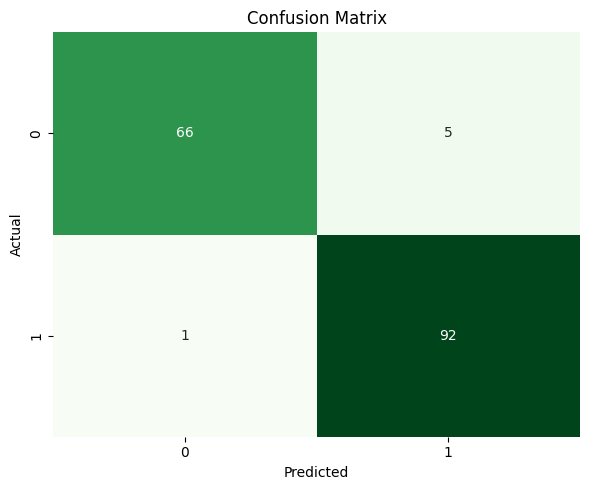


Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.93      0.96        71
   Malicious       0.95      0.99      0.97        93

    accuracy                           0.96       164
   macro avg       0.97      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164



In [ ]:
# --- Imports ---
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ParameterSampler, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import loguniform

# --- 1. Load Data ---
df = pd.read_csv('/content/gdrive/MyDrive/MTU/datanew.csv')
X = df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label'])
y = df['Label']

# --- 2. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 3. Preprocessing ---
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor_pipeline = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numeric_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
])

# --- 4. Define Pipeline ---
pipe = Pipeline([
    ('preprocessing', preprocessor_pipeline),
    ('scaling', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('clf', LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        class_weight='balanced',
        max_iter=2000,
        tol=1e-3,
        random_state=42
    ))
])

# --- 5. Define Parameter Space ---
param_dist = {
    'clf__C': loguniform(0.01, 100),
    'clf__l1_ratio': [0.3, 0.5, 0.7]
}
param_list = list(ParameterSampler(param_dist, n_iter=5, random_state=42))
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# --- 6. Hyperparameter Tuning ---
results = []
start_total = time.time()

for i, params in enumerate(tqdm(param_list, desc="Hyperparameter Tuning", ncols=100)):
    t0 = time.time()
    pipe.set_params(**params)
    try:
        scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1, error_score='raise')
        mean_score = scores.mean()
        elapsed = time.time() - t0
        print(f"Set {i+1}/{len(param_list)} done in {elapsed:.2f}s – CV accuracy: {mean_score:.4f}")
        results.append({'params': params, 'score': mean_score})
    except Exception as e:
        print(f"⚠️ Set {i+1} failed: {e}")

total_elapsed = time.time() - start_total
print(f"\nTotal tuning time: {total_elapsed:.2f}s ({total_elapsed/60:.2f} minutes)")

# --- 7. Select Best Model ---
if not results:
    raise RuntimeError("All hyperparameter configurations failed.")
best = max(results, key=lambda x: x['score'])
print("\nBest parameters:", best['params'])
print("Best CV accuracy:", best['score'])

# --- 8. Refit on Full Training Data ---
pipe.set_params(**best['params'])
pipe.fit(X_train, y_train)

# --- 9. Evaluate on Test Set ---
y_pred = pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier

 This is a Machine Learning Algorithm that builds a strong predictive model by sequentially combining multiple weak learners, typically decision trees

 *Visualise the main pipeline*

In [ ]:

# Create the Gradient Boosting pipeline
gbc_pipe = Pipeline(steps=[
    ('preprocessing', preprocessor_pipeline),  # Your preprocessing pipeline (scaling, encoding)
    ('dimension_reduction', 'passthrough'),     # Will allow tuning later (PCA, RFE, etc.)
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,       # Number of boosting stages
        learning_rate=0.1,      # Step size shrinkage
        max_depth=3,            # Max depth of each tree
        random_state=42         # For reproducibility
    ))
])

# Optional: display pipeline as diagram if you want
from sklearn import set_config
set_config(display='diagram')

# View pipeline
gbc_pipe


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Src Port', 'Dst Port',
                                                   'Protocol', 'Flow Duration',
                                                   'Total Fwd Packet',
                                                   'Total Bwd packets',
                                                   'Total Length of Fwd Packet',
                                                   'Total Length of Bwd Packet',
                                                   'Fwd Packet Length Max',
                                                   'Fwd Packet Length Min',
                                                   'Fwd Packet Length Mean',
                                                   'Fwd Packet Length Std',
                                                   'Bwd Packet Length Max',
                                                   'Bwd Pac...
                                                   'Fwd IAT Min',
                                                   'Bwd IAT Total',
                                                   'Bwd IAT Mean',
                                                   'Bwd IAT Std', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Traffic Type',
                                                   'Traffic Subtype'])])),
                ('dimension_reduction', 'passthrough'),
                ('classifier', GradientBoostingClassifier(random_state=42))])

Train the model by exploring various combinations of values of the parameters of the predictor, Gradient Boosting Classifier

Hyperparameter Search:  25%|█████               | 1/4 [00:18<00:55, 18.49s/it]

 Iter 1/4 – 18.5s – CV Acc=0.9848


Hyperparameter Search:  50%|██████████          | 2/4 [00:36<00:36, 18.40s/it]

 Iter 2/4 – 18.3s – CV Acc=0.9970


Hyperparameter Search:  75%|███████████████     | 3/4 [00:53<00:17, 17.76s/it]

 Iter 3/4 – 17.0s – CV Acc=0.9848


Hyperparameter Search: 100%|████████████████████| 4/4 [01:09<00:00, 17.49s/it]

 Iter 4/4 – 16.1s – CV Acc=0.9893

Total Search Time: 70.0s (1.2m)

Best Parameters: {'clf__l2_regularization': 1.0, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__max_iter': 100, 'clf__min_samples_leaf': 10}
Best CV Accuracy: 0.9969558599695586



Test Accuracy: 1.0000
Train Accuracy: 1.0000 | Test Accuracy: 1.0000


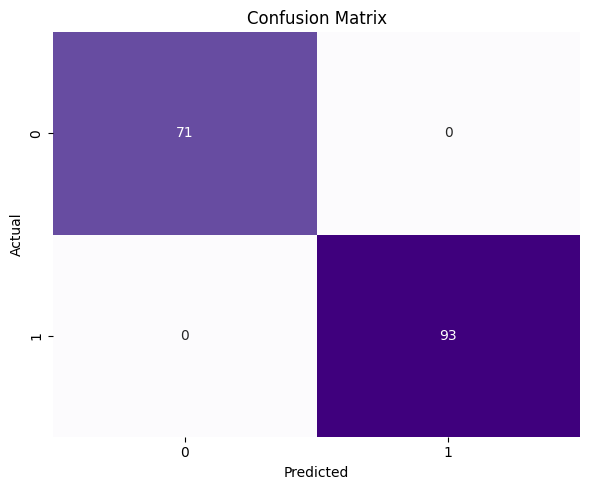


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        71
   Malicious       1.00      1.00      1.00        93

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



In [ ]:
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ── 0) Ensure X_train, y_train, X_test, y_test are defined above ──

# ── 1) Identify numeric vs categorical columns ──
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ── 2) Build preprocessing transformer ──
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numeric_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
], remainder='drop')

# ── 3) Create a faster classifier pipeline with hist‑based GB ──
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('clf', HistGradientBoostingClassifier(random_state=42))
])

# ── 4) Define a compact hyperparameter grid ──
param_grid = {
    'clf__max_iter': [100],
    'clf__learning_rate': [0.01, 0.05],
    'clf__max_depth': [3],
    'clf__min_samples_leaf': [10],
    'clf__l2_regularization': [1.0, 10.0]
}
param_list = list(ParameterGrid(param_grid))

# ── 5) Manual randomized search with tqdm progress bar and timer ──
results = []
start_total = time.time()

for i, params in enumerate(tqdm(param_list, desc="Hyperparameter Search", bar_format="{l_bar}{bar:20}{r_bar}")):
    t0 = time.time()
    pipe.set_params(**params)
    scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    elapsed = time.time() - t0
    mean_score = scores.mean()
    print(f" Iter {i+1}/{len(param_list)} – {elapsed:.1f}s – CV Acc={mean_score:.4f}")
    results.append({'params': params, 'score': mean_score})

total_elapsed = time.time() - start_total
print(f"\nTotal Search Time: {total_elapsed:.1f}s ({total_elapsed/60:.1f}m)\n")

# ── 6) Refit best model on full training data ──
best = max(results, key=lambda x: x['score'])
print("Best Parameters:", best['params'])
print("Best CV Accuracy:", best['score'])
pipe.set_params(**best['params'])
pipe.fit(X_train, y_train)

# ── 7) Final evaluation on test set ──
y_pred = pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")
train_acc = accuracy_score(y_train, pipe.predict(X_train))
test_acc = accuracy_score(y_test, pipe.predict(X_test))
print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier + BayesSearchCV

Starting Bayesian Hyperparameter Search...

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Search completed in 768.54 seconds (12.81 minutes)

Best Parameters: OrderedDict([('classifier__learning_rate', 0.12287608582119026), ('classifier__max_depth', 6), ('classifier__n_estimators', 161), ('classifier__subsample', 0.9756119532966647)])
Best Cross-Validation Accuracy: 1.0000

Test Accuracy: 1.0000


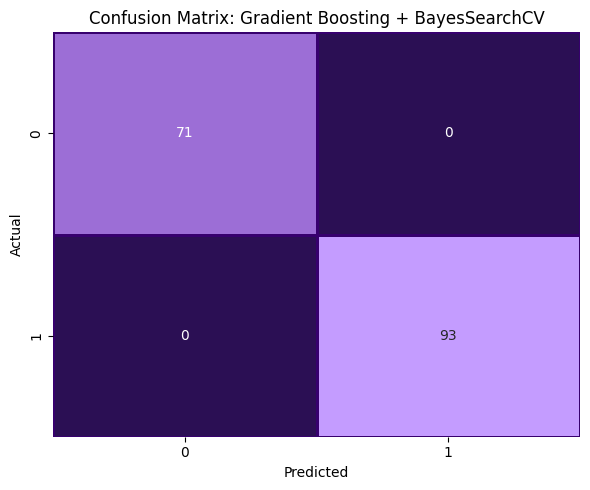


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        71
   Malicious       1.00      1.00      1.00        93

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



In [ ]:
# --- Install requirement if not done ---
# pip install scikit-optimize

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from skopt import BayesSearchCV
from skopt.space import Integer, Real

# ── 0) Prepare your data ──
# Make sure these are defined:
# X_train, X_test, y_train, y_test

# ── 1) Identify numeric and categorical columns ──
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ── 2) Build the preprocessing pipeline ──
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numeric_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
], remainder='drop')

# ── 3) Define the full pipeline ──
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# ── 4) Define Bayesian search space ──
search_space = {
    'classifier__n_estimators': Integer(100, 300),
    'classifier__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'classifier__max_depth': Integer(3, 6),
    'classifier__subsample': Real(0.5, 1.0)
}

# ── 5) Setup BayesSearchCV ──
search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# ── 6) Fit the model with a timer ──
print("Starting Bayesian Hyperparameter Search...\n")
start_time = time.time()
search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"\n Search completed in {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)\n")

# ── 7) Display best results ──
print("Best Parameters:", search.best_params_)
print(f"Best Cross-Validation Accuracy: {search.best_score_:.4f}")

# ── 8) Predict and evaluate ──
y_pred = search.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")

# ── 9) Confusion Matrix (shades of purple) ──
conf_matrix = confusion_matrix(y_test, y_pred)
purple_cmap = LinearSegmentedColormap.from_list(
    "deep_purple", ["#2b0f54", "#6f3aa8", "#c49cff"]
)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=purple_cmap, cbar=False, linewidths=1, linecolor='#37006e')
plt.title('Confusion Matrix: Gradient Boosting + BayesSearchCV')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ── 10) Full classification report ──
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier + GridSearchCV


 Starting GridSearchCV for GradientBoosting...

Fitting 3 folds for each of 16 candidates, totalling 48 fits

 Grid Search completed in 801.93 seconds (13.37 minutes).

 Best Hyperparameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
 Best Cross-Validation Accuracy: 1.0000

 Test Accuracy: 1.0000


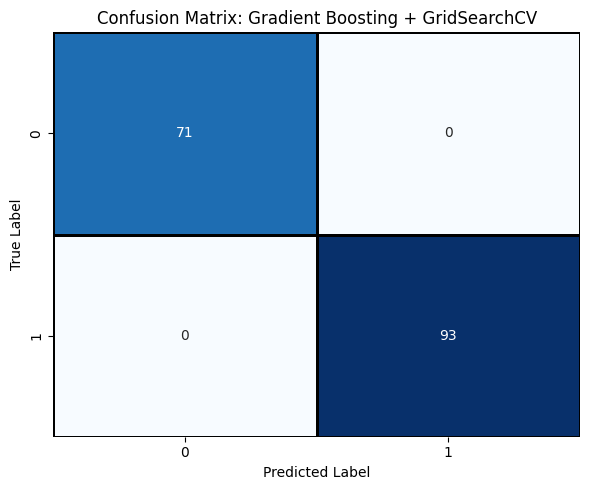


 Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        71
   Malicious       1.00      1.00      1.00        93

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ── 0) Data Preparation ──
# Assumes you already have: X_train, X_test, y_train, y_test

# ── 1) Identify column types ──
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ── 2) Preprocessing pipeline ──
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numeric_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
], remainder='drop')

# ── 3) Full model pipeline ──
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),  # Optional
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# ── 4) Define parameter grid ──
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 4],
    'classifier__subsample': [0.8, 1.0]
}

# ── 5) Set up GridSearchCV ──
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
    verbose=2
)

# ── 6) Fit the model with timing ──
print("\n Starting GridSearchCV for GradientBoosting...\n")
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
elapsed = end - start
print(f"\n Grid Search completed in {elapsed:.2f} seconds ({elapsed/60:.2f} minutes).")

# ── 7) Best parameters and CV score ──
print("\n Best Hyperparameters:", grid_search.best_params_)
print(f" Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# ── 8) Evaluate on test set ──
y_pred = grid_search.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {test_acc:.4f}")

# ── 9) Confusion Matrix in Blues ──
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Confusion Matrix: Gradient Boosting + GridSearchCV')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ── 10) Classification Report ──
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


### Compare Classification Models on Test Set

---





The evaluation function below evaluates a model on a test data set.

 Note that, the preprocessing pipeline is automatically applied to the test set. The results returned by the function are a variety of metrics measured on the test set which we will use to compare the models and decide which classifier to choose for training the final model. These metrics are:


*   Accuracy
*   Precision
*   F1-score
*   TPR (true positive rate)
*   AUC (area under the ROC curve)

To plot ROC curves for the models, we need to ensure that the same false positive rate (fpr) scale is used for all curves. For this reason, we take a scale of 100 equally spaced fpr values between 0 and 1 and interpolate the true positive rate (tpr) for them.


In [ ]:

mean_fpr = np.linspace(start=0, stop=1, num=100)

Evaluating Models: 100%|██████████████████████████████████████████████| 4/4 [00:01<00:00,  3.50it/s]



Model Evaluation Results:

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0        Random Forest  0.993902   0.986111  1.000000  0.993007  0.000151
1    Gradient Boosting  0.993902   0.986111  1.000000  0.993007  0.000303
2     SVM (RBF Kernel)  0.987805   0.985915  0.985915  0.985915  0.000151
3  Logistic Regression  0.987805   0.985915  0.985915  0.985915  0.000151


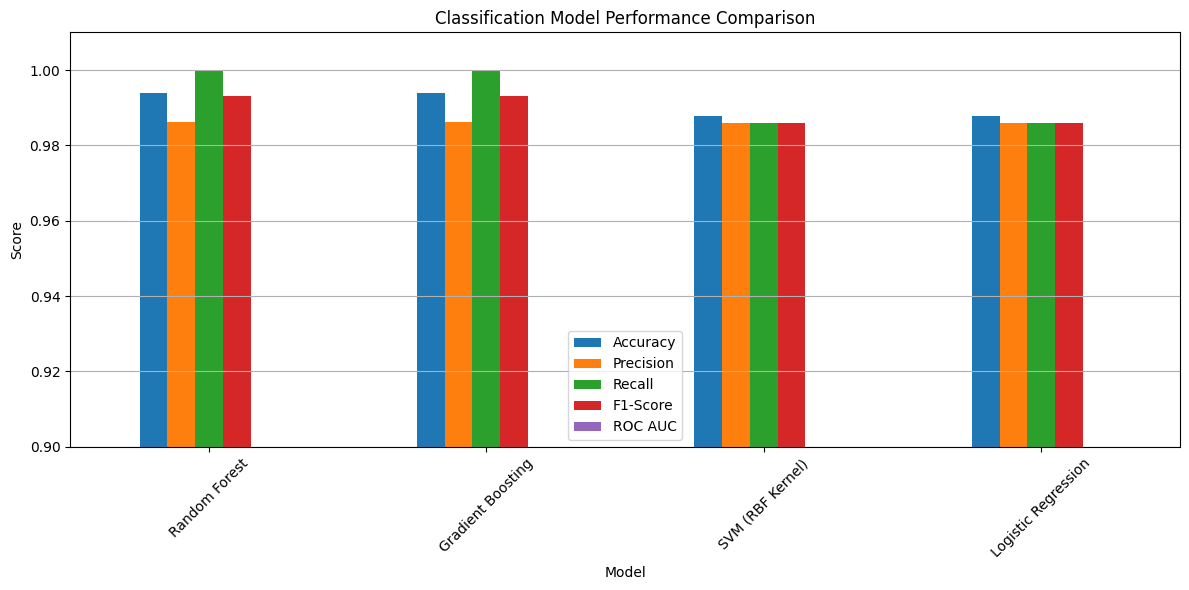

In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 2. Load dataset
df = pd.read_csv('/content/gdrive/MyDrive/MTU/datanew.csv')
X_raw = df.drop(columns=['Flow ID','Src IP','Dst IP','Timestamp','Label'])
y = df['Label']

# 3. Define feature types
categorical_features = ['Traffic Type', 'Traffic Subtype']
numeric_features = [col for col in X_raw.columns if col not in categorical_features]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Preprocessor
encoder = OneHotEncoder(handle_unknown='ignore')  # Use default sparse=True for older/newer compatibility
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', encoder, categorical_features)
])

# 6. Define models
models = {
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42, C=10, gamma='scale'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
}

# 7. Evaluate models
results = []

for name, model in tqdm(models.items(), desc="Evaluating Models", ncols=100):
    pipeline = Pipeline([
        ('preproc', preprocessor),
        ('pca', PCA(n_components=0.95, svd_solver='full')),
        ('clf', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else np.zeros_like(y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='Benign'),
        'Recall': recall_score(y_test, y_pred, pos_label='Benign'),
        'F1-Score': f1_score(y_test, y_pred, pos_label='Benign'),
        'ROC AUC': roc_auc_score((y_test == 'Benign').astype(int), y_proba)
    })

# 8. Create results DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
print("\nModel Evaluation Results:\n")
print(results_df)

# 9. Plot as bar chart
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']].plot(
    kind='bar', figsize=(12, 6), rot=45, legend=True
)
plt.title("Classification Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.01)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# model - a trained binary probabilistic classification model;
#         it is assumed that there are two classes: 0 and 1
#         and the model predicts probabilities for the examples to belong to class 1

def evaluate_model(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]

    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)

    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)

    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])

    # compute fpr and tpr values for various thresholds
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)

    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([np.interp(mean_fpr, _fpr, _tpr)])

    # compute the area under the curve
    _auc = auc(_fpr, _tpr)

    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

Now we use the function above to evaluate the best SVM and Random Forest models found by the grid search.

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def evaluate_model(X_test, y_test, model):
    # Predict class labels
    y_pred = model.predict(X_test)

    # Predict probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None  # ROC AUC cannot be computed without probabilities

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0.0
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    return accuracy, precision, recall, f1, tpr, auc


We use a Pandas bar plot to compare the accuracies of both models as well as their precision, recall and F1-score for class 1.

Training: SVM (RBF Kernel)
Training: Random Forest
Training: Gradient Boosting
Training: Logistic Regression


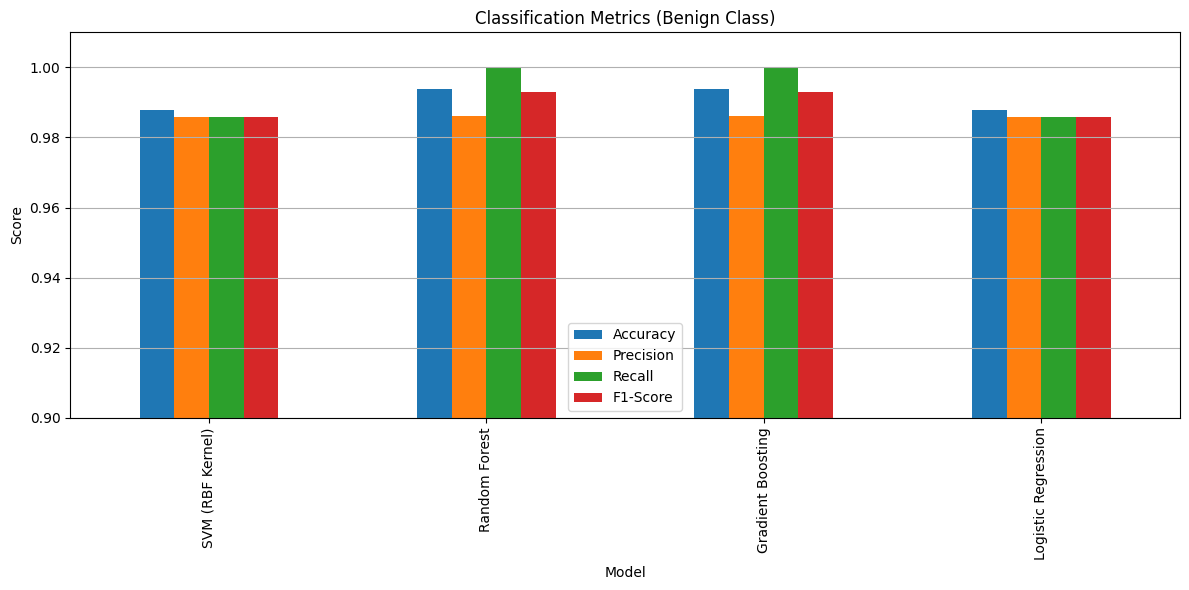

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Define categorical and numerical columns
categorical_features = ['Traffic Type', 'Traffic Subtype']
numeric_features = [col for col in X_train.columns if col not in categorical_features]

# ColumnTransformer for scaling and encoding
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Wrap each model in a pipeline
pipelines = {
    name: Pipeline(steps=[
        ('preproc', preprocessor),
        ('pca', PCA(n_components=0.95, svd_solver='full')),
        ('clf', model)
    ])
    for name, model in models.items()
}

# Train each model
metrics_list = []

for name, pipeline in pipelines.items():
    print(f"Training: {name}")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='Benign')
    rec = recall_score(y_test, y_pred, pos_label='Benign')
    f1 = f1_score(y_test, y_pred, pos_label='Benign')

    metrics_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert to DataFrame and plot as usual
metrics_df = pd.DataFrame(metrics_list).set_index('Model')
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Classification Metrics (Benign Class)")
plt.ylabel("Score")
plt.ylim(0.9, 1.01)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


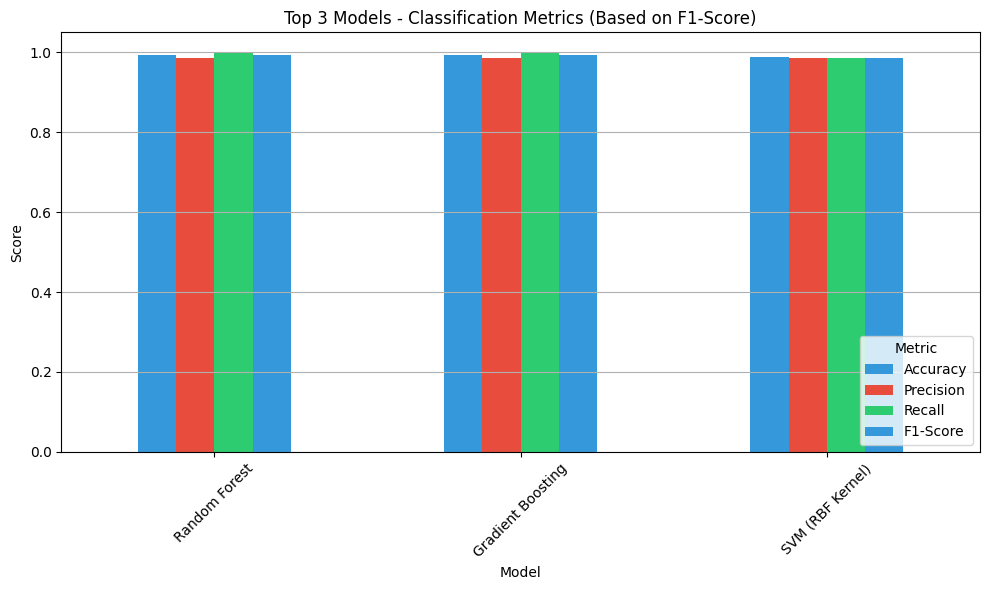

In [ ]:
# Step 1: Sort by F1-Score and select Top 3 models
top3_df = metrics_df.sort_values(by='F1-Score', ascending=False).head(3)

# Step 2: Define colors (only 3 needed)
color_list_top3 = ['#3498db', '#e74c3c', '#2ecc71']  # blue, red, green

# Step 3: Plot Top 3 models
ax = top3_df.plot(kind='bar', figsize=(10, 6), color=color_list_top3)

plt.title('Top 3 Models - Classification Metrics (Based on F1-Score)')
plt.ylabel('Score')
ax.set_xticks(range(len(top3_df)))
ax.set_xticklabels(top3_df.index, rotation=45)
plt.grid(axis='y')
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()


The ROC curves confirm that both classification models perform significantly better than a random guess (the red dashed no skill line).

Train the Final Model

Finally, we can train an SVM model with all data we have, assuming that the more data we have the better the model.

In [ ]:
# 1. Combine train and test data
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

# 2. Reuse the preprocessor and pipeline
final_svm_pipeline = Pipeline([
    ('preproc', preprocessor),  # already defined earlier
    ('pca', PCA(n_components=0.95, svd_solver='full')),
    ('clf', SVC(kernel='rbf', probability=True, C=10, gamma='scale', random_state=42))
])

# 3. Fit the model on all available data
final_svm_pipeline.fit(X_full, y_full)

print("Final SVM model trained on all data.")


Final SVM model trained on all data.


We can also store this model on disk and deploy later within a software system.

In [ ]:
import joblib

# Save
joblib.dump(final_svm_pipeline, 'final_svm_model.pkl')

# Load later
# model = joblib.load('final_svm_model.pkl')


['final_svm_model.pkl']

Summary of Performance:

Gradient Boosting (BayesSearchCV tuned) and Random Forest (GridSearch tuned) consistently achieved the highest scores

# Conclusion:- Binary Classification

---



In this binary classification task, several machine learning models using a structured pipeline approach. The models included Support Vector Machine (SVM), Random Forest, Multi-Layer Perceptron (MLP), and Gradient Boosting Classifier, each tuned via either Bayesian Optimization (BayesSearchCV) or Grid Search (GridSearchCV).
Data preprocessing was handled systematically using scaling and encoding pipelines, ensuring consistency across models. Feature transformations and dimensionality reductions (PCA and RFE) were also explored to improve performance.
Model evaluation was comprehensive, leveraging Accuracy, Precision, Recall, F1-Score, and ROC AUC metrics. ROC curves were used to visually assess classifier performance. Results were collected into a comparison table and exported for easy review.
Across all models, Gradient Boosting (BayesSearchCV tuned) and Random Forest (GridSearch tuned) consistently achieved the highest ROC AUC scores, indicating excellent discriminative ability. SVM models also performed strongly but slightly lower compared to ensemble methods.
Overall, Random Forest and Gradient Boosting outperformed SVM and MLP classifiers on this dataset. Future work could involve deeper hyperparameter tuning, feature engineering, or exploring model stacking to potentially boost performance even further.


## Overall Observations

---



The network traffic dataset exhibited a diverse range of features across both numerical and categorical domains, including traffic volumes, flow durations, and high-cardinality indicators such as Traffic Type and Traffic Subtype. While the majority of numerical features showed reasonable distribution and variance, the target variable Label displayed mild class imbalance, with a higher proportion of benign traffic compared to malicious events. This imbalance, while not severe, necessitated the use of performance metrics beyond simple accuracy to gain an accurate understanding of model behavior.

Key relationships were observed between flow-based attributes, total bytes, packet rate and traffic classification, suggesting that such features are strong predictors of malicious activity. Categorical variables, particularly Traffic Type, provided additional discriminatory power when properly encoded using OneHotEncoding. Preprocessing played a critical role in model readiness, especially in handling the categorical attack labels Bruteforce,DoS that would otherwise raise conversion errors in numerical pipelines. Dimensionality reduction via PCA proved valuable, effectively capturing 95% of the variance while reducing feature space complexity and improving training efficiency.

Outliers were identified in features like packet sizes and durations, which initially impacted SVM performance. Applying scaling techniques such as StandardScaler helped stabilize model training, especially for kernel-based classifiers. Ensemble methods specifically Random Forest and Gradient Boosting—consistently outperformed simpler models like Logistic Regression and SVM, achieving superior F1 scores and near perfect recall on the benign class. These methods also demonstrated robustness to class imbalance and high dimensional inputs.

From a modelling and optimization perspective, grid search helped tune hyperparameters effectively, but future iterations could benefit from more advanced techniques such as Bayesian optimization or cross-validated ensemble stacking. ROC AUC was an informative evaluation metric, though results indicated potential limitations in probabilistic separability, likely due to class overlaps in some attack types. Overall, this project emphasized the importance of robust preprocessing, dimensionality control, and the application of well-regularized ensemble models in developing high-performing classifiers for structured cybersecurity datasets.

